In [5]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from static_1Dfunction import *

In [2]:
# model parameters
c = 10.0;
gmax = 0.05;
k1 = 5.0;
k2 = 5.0;
d = 0.25;
alpha = 0.2;
w0 = 0.2;
rw = 0.2;
DP = 0.1;
DW = 0.1;
DO = 100;
param={'c':c,'gmax':gmax,'k1':k1,'d':d,'DP':DP,'alpha':alpha,'k2':k2,'w0':w0,'rw':rw,'DW':DW,'DO':DO}


In [3]:
def plot_sols(sols,m):
    max_P=np.zeros(len(sols))
    mean_P=np.zeros(len(sols))
    Rains=np.zeros(len(sols))
    for i in range(len(sols)):
        max_P[i]=np.max(sols[i][1])
        mean_P[i]=np.mean(sols[i][1])
        Rains[i]=sols[i][0]
    print(L)
    fig,ax=plt.subplots(1,4,figsize=(20,5))
    #ax.plot(Rains,max_P,color='red',label='Maximum biomass')
    #ax.plot(Rains,mean_P,color='black',label='Mean biomass')
    ax[0].plot(Rains,max_P,color='red',marker='.',label='Maximum biomass')
    ax[0].plot(Rains,mean_P,color='black',marker='.',label='Mean biomass')
    ax[0].plot(sols[0][0],np.max(sols[0][1]),'o',color='red',label='Maximum biomass')
    ax[0].plot(sols[0][0],np.mean(sols[0][1]),'o',color='black',label='Mean biomass')
    ax[0].plot(sols[m][0],np.max(sols[m][1]),'^',color='green',label='Maximum biomass')
    ax[0].plot(sols[m][0],np.mean(sols[m][1]),'v',color='green',label='Mean biomass')
    ax[0].set_xlim(0,1.5)
    ax[0].set_ylim(0,20)
    ax[0].legend()
    ax[1].plot(x,sols[m][1])
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('P')
    ax[1].set_ylabel('Rain')
    ax[1].set_ylim((0,20))
    ax[2].plot(x,sols[m][2])
    ax[2].set_xlabel('x')
    ax[2].set_ylabel('W')
    ax[3].plot(x,sols[m][3])
    ax[3].set_xlabel('x')
    ax[3].set_ylabel('O')
    return()


### For L=100

Text(0, 0.5, '$\\kappa$')

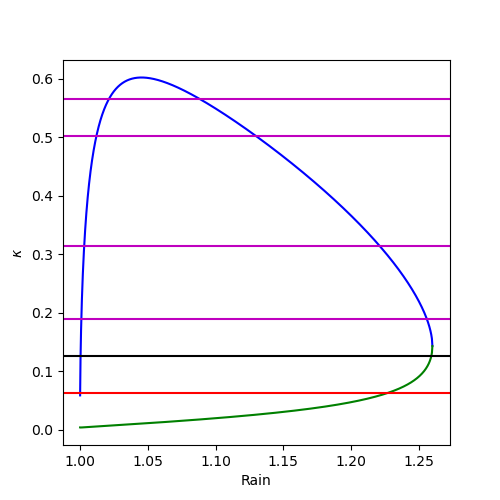

In [4]:
kappa=np.flip(np.loadtxt('Guesses1.dat'),axis=0)

L=100
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.plot(kappa[:,0],kappa[:,1],'b')
ax.plot(kappa[:,0],kappa[:,2],'g')
ax.axhline(2*np.pi/L,color='r',label='L=50 m')
ax.axhline(2*2*np.pi/L,color='k',label='L=50 m')
ax.axhline(3*2*np.pi/L,color='m',label='L=50 m')
ax.axhline(5*2*np.pi/L,color='m',label='L=50 m')
ax.axhline(8*2*np.pi/L,color='m',label='L=50 m')
ax.axhline(9*2*np.pi/L,color='m',label='L=50 m')
ax.set_xlabel('Rain')
ax.set_ylabel(r'$\kappa$')

### First mode with high precipitation


In [5]:

valmax = np.max(kappa[:,0])
valmin = 1.22

R0=find_kappa_L(L,1,valmin,valmax,kappa)
print(R0)
R1=find_kappa_L(L,2,valmin,valmax,kappa)
print(R1)
#R2=find_kappa_U(L,3,valmin,valmax,kappa)
#print(R2)
n_lmb=1
N=100

1.2269327228860956
1.2590174925399629


In [6]:
Rain,L,N,D2,x,Pg,Wg,Og,k = initialGuess(R0,kappa,mode="L",n_lmb=n_lmb,eps=1.5,N=N)
print(L)
print(k)
Ph,Wh,Oh=homogeneous(Rain)
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Ph*np.ones(N),label='Homogeneous')
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wh*np.ones(N),label='Homogeneous')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Oh*np.ones(N),label='Homogeneous')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

99.99999999995092
0.0628318530718267


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'O')

In [7]:
Rain,L,N,D2,x,Pg,Wg,Og,k = initialGuess(R0,kappa,mode="L",n_lmb=n_lmb,eps=1.5,N=N)
mode='one'
Rain = Rain-0.00001
Pg=Pg
print(L)
#Ph,Wh,Oh = homogeneous(Rain)
eps_newton = 0.01; # initial ϵ_newton
for it in range(600):
    Pnew,Wnew,Onew = newton(L,N,Rain,Pg,Wg,Og,eps_newton,param)
    delta_list = [np.max(np.abs(Pnew - Pg)),np.max(np.abs(Wnew - Wg)),np.max(np.abs(Onew - Og))]
    max_update = np.max(delta_list)
    source = static_eqs(L,N,Rain,Pnew,Wnew,Onew,param)
    max_source = np.abs(np.sum(source)/(3*N))
    if max_update < 1e-6 and max_source < 1e-10:
        print(max_update, max_source)
        break
    elif it>=30 and max_update<0.1:
        eps_newton = 0.1
    elif it>=50 and max_update<0.01:
        eps_newton = 1.0
    #elseif it>=50 && max_update<0.001
    #    ϵ_newton = 1.1
    elif max_update > 10:
        print(max_update, max_source)
        print("failed")
        break
    Pg, Wg, Og = Pnew, Wnew, Onew

99.99999999995092
4.545853542481382e-07 2.0957917892360483e-12


In [8]:
Ph,Wh,Oh=homogeneous(Rain)
print(Rain)
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Ph*np.ones(N),label='Homogeneous')
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wh*np.ones(N),label='Homogeneous')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Oh*np.ones(N),label='Homogeneous')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

1.2269227228860955


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'O')

In [9]:
Rain = Rain-0.000
#Pg=P
#Wg=W
#Og=O

sols = [[Rain,Pg,Wg,Og]]
while Rain > 1.22:
    Rain = Rain-0.0001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og)
    sols.append([Rain,Pg,Wg,Og])


In [10]:
plot_sols(sols,-1)

99.99999999995092


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [11]:
save_RvsPWO(sols,'sols1','P',mode,int(np.round(L)))
save_RvsPWO(sols,'sols1','W',mode,int(np.round(L)))
save_RvsPWO(sols,'sols1','O',mode,int(np.round(L)))

In [12]:
Rain,Pg,Wg,Og = sols[-1]
Rain = Rain + 0.00
Pg = Pg + 0
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
print(Rain)
sols2 = [[Rain,Pnew,Wnew,Onew]]


1.2199227228860963


In [13]:
Rain,Pg,Wg,Og = sols2[0]
while Rain > 1.17:
    Rain = Rain-0.01
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-4,crit_source = 1e-6)
    sols2.append([Rain,Pg,Wg,Og])


In [14]:
plot_sols(sols2,-1)

99.99999999995092


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [15]:
save_RvsPWO(sols2,'sols2','P',mode,int(np.round(L)))
save_RvsPWO(sols2,'sols2','W',mode,int(np.round(L)))
save_RvsPWO(sols2,'sols2','O',mode,int(np.round(L)))

In [16]:
Rain,Pg,Wg,Og = sols2[-1]
Rain = Rain + 0.00
Pg = Pg 
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
print(Rain)
sols3 = [[Rain,Pnew,Wnew,Onew]]


1.1699227228860962


In [17]:
Rain,Pg,Wg,Og = sols3[-1]
sols3 = [[Rain,Pg,Wg,Og]]

while Rain > 1.150:
    Rain = Rain-0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-4,crit_source = 1e-6)
    sols3.append([Rain,Pg,Wg,Og])


In [18]:
plot_sols(sols3,-1)

99.99999999995092


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [19]:
save_RvsPWO(sols3,'sols3','P',mode,int(np.round(L)))
save_RvsPWO(sols3,'sols3','W',mode,int(np.round(L)))
save_RvsPWO(sols3,'sols3','O',mode,int(np.round(L)))

In [20]:
Rain,Pg,Wg,Og = sols3[-1]
Rain = Rain + 0.001
Pg = Pg -0.15
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
print(Rain)
sols4 = [[Rain,Pnew,Wnew,Onew]]


1.1509227228860983


In [21]:
Rain,Pg,Wg,Og = sols4[-1]
sols4 = [[Rain,Pg,Wg,Og]]

while Rain < 1.17:
    Rain = Rain+0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-4,crit_source = 1e-6)
    sols4.append([Rain,Pg,Wg,Og])


In [22]:
plot_sols(sols4,-1)

99.99999999995092


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [23]:
save_RvsPWO(sols4,'sols4','P',mode,int(np.round(L)))
save_RvsPWO(sols4,'sols4','W',mode,int(np.round(L)))
save_RvsPWO(sols4,'sols4','O',mode,int(np.round(L)))

In [24]:
Rain,Pg,Wg,Og = sols4[-1]
Rain = Rain - 0.000
Pg = Pg -0
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
print(Rain)
sols5 = [[Rain,Pnew,Wnew,Onew]]


1.1709227228860961


In [25]:
Rain,Pg,Wg,Og = sols5[-1]
sols5 = [[Rain,Pg,Wg,Og]]

while Rain < 1.219:
    Rain = Rain+0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-4,crit_source = 1e-6)
    sols5.append([Rain,Pg,Wg,Og])


In [26]:
plot_sols(sols5,-1)

99.99999999995092


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [27]:
save_RvsPWO(sols5,'sols5','P',mode,int(np.round(L)))
save_RvsPWO(sols5,'sols5','W',mode,int(np.round(L)))
save_RvsPWO(sols5,'sols5','O',mode,int(np.round(L)))

In [28]:
Rain,Pg,Wg,Og = sols5[-1]
Rain = Rain - 0.000
Pg = Pg -0
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
print(Rain)
sols6 = [[Rain,Pnew,Wnew,Onew]]


1.2199227228860907


In [29]:
Rain,Pg,Wg,Og = sols6[-1]
sols6 = [[Rain,Pg,Wg,Og]]

while Rain < 1.22096:
    Rain = Rain+0.000001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-4,crit_source = 1e-6)
    sols6.append([Rain,Pg,Wg,Og])


In [30]:
plot_sols(sols6,-1)

99.99999999995092


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [31]:
save_RvsPWO(sols6,'sols6','P',mode,int(np.round(L)))
save_RvsPWO(sols6,'sols6','W',mode,int(np.round(L)))
save_RvsPWO(sols6,'sols6','O',mode,int(np.round(L)))

### First mode with low rainfall

In [5]:
kappa=np.flip(np.loadtxt('Guesses1.dat'),axis=0)

L=100

valmin = np.min(kappa[:,0])
valmax = 1.01

R=find_kappa_U(L,1,valmin,valmax,kappa)
print(R)
#R2=find_kappa_U(L,3,valmin,valmax,kappa)
#print(R2)
n_lmb=1
N=100

1.000116016401717


In [6]:
Rain,L,N,D2,x,Pg,Wg,Og,k = initialGuess(R,kappa,mode="U",n_lmb=n_lmb,eps=0.0005,N=N)
print(L)
print(k)
Ph,Wh,Oh=homogeneous(Rain)
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Ph*np.ones(N),label='Homogeneous')
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wh*np.ones(N),label='Homogeneous')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Oh*np.ones(N),label='Homogeneous')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

99.99999999992454
0.06283185307184327


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'O')

In [7]:
Rain,L,N,D2,x,Pg,Wg,Og,k = initialGuess(R,kappa,mode="U",n_lmb=n_lmb,eps=0.01,N=N)
mode='one'
Rain = Rain-0.0001
Pg=Pg
print(L)
#Ph,Wh,Oh = homogeneous(Rain)
eps_newton = 0.01; # initial ϵ_newton
for it in range(600):
    Pnew,Wnew,Onew = newton(L,N,Rain,Pg,Wg,Og,eps_newton,param)
    delta_list = [np.max(np.abs(Pnew - Pg)),np.max(np.abs(Wnew - Wg)),np.max(np.abs(Onew - Og))]
    max_update = np.max(delta_list)
    source = static_eqs(L,N,Rain,Pnew,Wnew,Onew,param)
    max_source = np.abs(np.sum(source)/(3*N))
    if max_update < 1e-6 and max_source < 1e-10:
        print(max_update, max_source)
        break
    elif it>=30 and max_update<0.1:
        eps_newton = 0.1
    elif it>=50 and max_update<0.01:
        eps_newton = 1.0
    #elseif it>=50 && max_update<0.001
    #    ϵ_newton = 1.1
    elif max_update > 10:
        print(max_update, max_source)
        print("failed")
        break
    Pg, Wg, Og = Pnew, Wnew, Onew

99.99999999992454
5.405016167969734e-08 9.31019323791926e-11


In [8]:
Ph,Wh,Oh=homogeneous(Rain)
print(Rain)
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Ph*np.ones(N),label='Homogeneous')
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wh*np.ones(N),label='Homogeneous')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Oh*np.ones(N),label='Homogeneous')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

1.0000160164017171


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'O')

In [9]:
Rain = Rain-0.0001
#Pg=P
#Wg=W
#Og=O

sols = [[Rain,Pg,Wg,Og]]
while Rain > 0.5:
    Rain = Rain-0.01
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og)
    sols.append([Rain,Pg,Wg,Og])


In [10]:

plot_sols(sols,-1)

99.99999999992454


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [11]:
save_RvsPWO(sols,'sols1','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','O',mode+'R0',int(np.round(L)))

In [12]:
Rain,Pg,Wg,Og = sols[-1]
Rain = Rain + 0.000
Pg = Pg + 0.0
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

#Spatial grid
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Temporal grid
tmax=2000
M=tmax*10+1
dt=tmax/(M-1)
Dt=10
prec=Rain*np.ones(M)

#Pnew,Wnew,Onew=VegModelII_Riet_Spec_1D_end_02pi(L,N,M,tmax,dt,prec,Pg,Wg,Og,param)

print(Rain)
sols2 = [[Rain,Pnew,Wnew,Onew]]


0.4999160164017167


In [13]:
Rain,Pg,Wg,Og = sols2[0]
while Rain > 0.488:
    Rain = Rain-0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols2.append([Rain,Pg,Wg,Og])


In [14]:
plot_sols(sols2,-1)

99.99999999992454


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [15]:
save_RvsPWO(sols2,'sols2','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','O',mode+'R0',int(np.round(L)))

In [16]:
Rain,Pg,Wg,Og = sols2[-1]
Rain = Rain + 0.0001
Pg = Pg + 0.87
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
print(Rain)
sols3 = [[Rain,Pnew,Wnew,Onew]]

0.48801601640171666


In [17]:
Rain,Pg,Wg,Og = sols3[-1]
while Rain < 0.716:
    Rain = Rain+0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-3,crit_source = 1e-4)
    sols3.append([Rain,Pg,Wg,Og])


In [18]:
plot_sols(sols3,-1)

99.99999999992454


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [19]:
save_RvsPWO(sols3,'sols3','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols3,'sols3','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols3,'sols3','O',mode+'R0',int(np.round(L)))

In [20]:
Rain,Pg,Wg,Og = sols3[-1]
Rain = Rain-+ 0.001
Pg = Pg - 0.5
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
print(Rain)
sols4 = [[Rain,Pnew,Wnew,Onew]]

0.7150160164017169


In [22]:
Rain,Pg,Wg,Og = sols4[-1]
while Rain > 0.70:
    Rain = Rain-0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
    sols4.append([Rain,Pg,Wg,Og])


In [23]:
plot_sols(sols4,-1)

99.99999999992454


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [24]:
save_RvsPWO(sols4,'sols4','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols4,'sols4','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols4,'sols4','O',mode+'R0',int(np.round(L)))

In [25]:
Rain,Pg,Wg,Og = sols4[-1]
Rain = Rain-+ 0.00
Pg = Pg - 0.
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
print(Rain)
sols5 = [[Rain,Pnew,Wnew,Onew]]

0.6990160164017168


In [26]:
Rain,Pg,Wg,Og = sols5[-1]
while Rain > 0.58:
    Rain = Rain-0.01
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
    sols5.append([Rain,Pg,Wg,Og])


In [27]:
plot_sols(sols5,-1)

99.99999999992454


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [28]:
save_RvsPWO(sols5,'sols5','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols5,'sols5','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols5,'sols5','O',mode+'R0',int(np.round(L)))

In [29]:
Rain,Pg,Wg,Og = sols5[-1]
Rain = Rain+ 0.0001
Pg = Pg - 1
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
print(Rain)
sols6 = [[Rain,Pnew,Wnew,Onew]]

0.5791160164017167


In [30]:
Rain,Pg,Wg,Og = sols6[-1]
while Rain < 0.99:
    Rain = Rain+0.01
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
    sols6.append([Rain,Pg,Wg,Og])


In [31]:
plot_sols(sols6,-1)

99.99999999992454


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [33]:
save_RvsPWO(sols6,'sols6','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols6,'sols6','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols6,'sols6','O',mode+'R0',int(np.round(L)))

### Second mode with low rainfall

In [9]:
kappa=np.flip(np.loadtxt('Guesses1.dat'),axis=0)

L=100

valmin = 1.000119
valmax = 1.02
n_lmb=2
R=find_kappa_U(L,n_lmb,valmin,valmax,kappa)
print(R)
#R2=find_kappa_U(L,3,valmin,valmax,kappa)
#print(R2)
n_lmb=2

N=100
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.plot(kappa[:,0],kappa[:,1],'b')
ax.plot(kappa[:,0],kappa[:,2],'g')
ax.axhline(2*np.pi/L,color='r',label='first mode')
ax.axhline(2*2*np.pi/L,color='k',label='second mode')
ax.axhline(3*2*np.pi/L,color='b',label='third mode')
ax.axhline(4*2*np.pi/L,color='m',label='fourth mode')
ax.axhline(5*2*np.pi/L,color='yellow',label='fifth mode')
ax.legend()
ax.set_xlabel('Rain')
ax.set_ylabel(r'$\kappa$')

1.0004319153876176


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, '$\\kappa$')

In [10]:
Rain,L,N,D2,x,Pg,Wg,Og,k = initialGuess(R,kappa,mode="U",n_lmb=n_lmb,eps=0.0005,N=N)
print(L)
print(k)
Ph,Wh,Oh=homogeneous(Rain)
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Ph*np.ones(N),label='Homogeneous')
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wh*np.ones(N),label='Homogeneous')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Oh*np.ones(N),label='Homogeneous')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

100.00000000015257
0.1256637061434


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'O')

In [11]:
Rain,L,N,D2,x,Pg,Wg,Og,k = initialGuess(R,kappa,mode="U",n_lmb=n_lmb,eps=0.01,N=N)
mode='two'
Rain = Rain-0.0001
Pg=Pg
print(L)
#Ph,Wh,Oh = homogeneous(Rain)
eps_newton = 0.01; # initial ϵ_newton
for it in range(600):
    Pnew,Wnew,Onew = newton(L,N,Rain,Pg,Wg,Og,eps_newton,param)
    delta_list = [np.max(np.abs(Pnew - Pg)),np.max(np.abs(Wnew - Wg)),np.max(np.abs(Onew - Og))]
    max_update = np.max(delta_list)
    source = static_eqs(L,N,Rain,Pnew,Wnew,Onew,param)
    max_source = np.abs(np.sum(source)/(3*N))
    if max_update < 1e-6 and max_source < 1e-10:
        print(max_update, max_source)
        break
    elif it>=30 and max_update<0.1:
        eps_newton = 0.1
    elif it>=50 and max_update<0.01:
        eps_newton = 1.0
    #elseif it>=50 && max_update<0.001
    #    ϵ_newton = 1.1
    elif max_update > 10:
        print(max_update, max_source)
        print("failed")
        break
    Pg, Wg, Og = Pnew, Wnew, Onew

100.00000000015257
3.224364419907033e-08 9.307940905137436e-11


In [12]:
Ph,Wh,Oh=homogeneous(Rain)
print(Rain)
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Ph*np.ones(N),label='Homogeneous')
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wh*np.ones(N),label='Homogeneous')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Oh*np.ones(N),label='Homogeneous')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

1.0003319153876176


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'O')

In [13]:
Rain = Rain-0.0001
#Pg=P
#Wg=W
#Og=O

sols = [[Rain,Pg,Wg,Og]]
while Rain > 0.57:
    Rain = Rain-0.01
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og)
    sols.append([Rain,Pg,Wg,Og])


In [14]:
plot_sols(sols,-1)

100.00000000015257


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [15]:
save_RvsPWO(sols,'sols1','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','O',mode+'R0',int(np.round(L)))

In [16]:
Rain,Pg,Wg,Og = sols[-1]
#Rain = Rain + 0.001
#Pg = Pg + 1
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

#print(Rain)
sols2 = [[Rain,Pnew,Wnew,Onew]]
print(Rain)

0.5602319153876172


In [17]:
Rain,Pg,Wg,Og = sols2[0]
while Rain > 0.5573:
    Rain = Rain-0.0001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols2.append([Rain,Pg,Wg,Og])


In [18]:
plot_sols(sols2,-1)

100.00000000015257


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [19]:
save_RvsPWO(sols2,'sols2','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','O',mode+'R0',int(np.round(L)))

In [20]:
Rain,Pg,Wg,Og = sols2[-1]
Rain = Rain + 0.00001
Pg = Pg + 1
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols3 = [[Rain,Pnew,Wnew,Onew]]


0.5572419153876175


In [21]:
Rain,Pg,Wg,Og = sols3[0]
while Rain < 0.62:
    Rain = Rain+0.0001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols3.append([Rain,Pg,Wg,Og])


In [22]:
plot_sols(sols3,-1)

100.00000000015257


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [23]:
save_RvsPWO(sols3,'sols3','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols3,'sols3','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols3,'sols3','O',mode+'R0',int(np.round(L)))

In [24]:
Rain,Pg,Wg,Og = sols3[-1]
Rain = Rain +0
Pg = Pg - 0
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
print(Rain)
sols4 = [[Rain,Pnew,Wnew,Onew]]

0.6200419153876106


In [25]:
Rain,Pg,Wg,Og = sols4[-1]
while Rain < 1.29:
    Rain = Rain+0.01
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
    sols4.append([Rain,Pg,Wg,Og])


In [26]:
plot_sols(sols4,-1)

100.00000000015257


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [27]:
save_RvsPWO(sols4,'sols4','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols4,'sols4','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols4,'sols4','O',mode+'R0',int(np.round(L)))

In [28]:
Rain,Pg,Wg,Og = sols4[-1]
Rain = Rain +0
Pg = Pg - 0
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
print(Rain)
sols5 = [[Rain,Pnew,Wnew,Onew]]

1.290041915387611


In [29]:
Rain,Pg,Wg,Og = sols5[-1]
while Rain < 1.311:
    Rain = Rain+0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
    sols5.append([Rain,Pg,Wg,Og])


failed, Rain=1.3020419153876097


In [30]:
plot_sols(sols5,-1)

100.00000000015257


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [31]:
save_RvsPWO(sols5,'sols5','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols5,'sols5','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols5,'sols5','O',mode+'R0',int(np.round(L)))

In [32]:
Rain,Pg,Wg,Og = sols5[-1]
Rain = Rain -0.00005
Pg = Pg - 3.4
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
print(Rain)
sols6 = [[Rain,Pnew,Wnew,Onew]]

1.3109919153876086


In [33]:
Rain,Pg,Wg,Og = sols6[-1]
while Rain > 1.25:
    Rain = Rain-0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
    sols6.append([Rain,Pg,Wg,Og])


In [34]:
plot_sols(sols6,-1)

100.00000000015257


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [35]:
save_RvsPWO(sols6,'sols6','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols6,'sols6','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols6,'sols6','O',mode+'R0',int(np.round(L)))

### Third mode with low rainfall

In [5]:
kappa=np.flip(np.loadtxt('Guesses1.dat'),axis=0)

L=100

valmin = 1.000119
valmax = 1.02
n_lmb=3
R=find_kappa_U(L,n_lmb,valmin,valmax,kappa)
print(R)
#R2=find_kappa_U(L,3,valmin,valmax,kappa)
#print(R2)
n_lmb=3

N=100
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.plot(kappa[:,0],kappa[:,1],'b')
ax.plot(kappa[:,0],kappa[:,2],'g')
ax.axhline(2*np.pi/L,color='r',label='first mode')
ax.axhline(2*2*np.pi/L,color='k',label='second mode')
ax.axhline(3*2*np.pi/L,color='b',label='third mode')
ax.axhline(4*2*np.pi/L,color='m',label='fourth mode')
ax.legend()
ax.set_xlabel('Rain')
ax.set_ylabel(r'$\kappa$')

1.0009908764508446


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, '$\\kappa$')

In [6]:
Rain,L,N,D2,x,Pg,Wg,Og,k = initialGuess(R,kappa,mode="U",n_lmb=n_lmb,eps=0.0005,N=N)
print(L)
print(k)
Ph,Wh,Oh=homogeneous(Rain)
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Ph*np.ones(N),label='Homogeneous')
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wh*np.ones(N),label='Homogeneous')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Oh*np.ones(N),label='Homogeneous')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

100.00000000026711
0.1884955592148841


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'O')

In [7]:
Rain,L,N,D2,x,Pg,Wg,Og,k = initialGuess(R,kappa,mode="U",n_lmb=n_lmb,eps=0.01,N=N)
mode='three'
Rain = Rain-0.0001
Pg=Pg
print(L)
#Ph,Wh,Oh = homogeneous(Rain)
eps_newton = 0.01; # initial ϵ_newton
for it in range(600):
    Pnew,Wnew,Onew = newton(L,N,Rain,Pg,Wg,Og,eps_newton,param)
    delta_list = [np.max(np.abs(Pnew - Pg)),np.max(np.abs(Wnew - Wg)),np.max(np.abs(Onew - Og))]
    max_update = np.max(delta_list)
    source = static_eqs(L,N,Rain,Pnew,Wnew,Onew,param)
    max_source = np.abs(np.sum(source)/(3*N))
    if max_update < 1e-6 and max_source < 1e-10:
        print(max_update, max_source)
        break
    elif it>=30 and max_update<0.1:
        eps_newton = 0.1
    elif it>=50 and max_update<0.01:
        eps_newton = 1.0
    #elseif it>=50 && max_update<0.001
    #    ϵ_newton = 1.1
    elif max_update > 10:
        print(max_update, max_source)
        print("failed")
        break
    Pg, Wg, Og = Pnew, Wnew, Onew

100.00000000026711
3.03660501188574e-08 9.328631191968964e-11


In [8]:
Ph,Wh,Oh=homogeneous(Rain)
print(Rain)
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Ph*np.ones(N),label='Homogeneous')
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wh*np.ones(N),label='Homogeneous')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Oh*np.ones(N),label='Homogeneous')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

1.0008908764508446


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'O')

In [9]:
Rain = Rain-0.0001
#Pg=P
#Wg=W
#Og=O

sols = [[Rain,Pg,Wg,Og]]
while Rain > 0.65:
    Rain = Rain-0.01
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og)
    sols.append([Rain,Pg,Wg,Og])


In [10]:
plot_sols(sols,-1)

100.00000000026711


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [11]:
save_RvsPWO(sols,'sols1','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','O',mode+'R0',int(np.round(L)))

In [12]:
Rain,Pg,Wg,Og = sols[-1]
Rain = Rain + 0.000
Pg = Pg + 0
#Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols2 = [[Rain,Pg,Wg,Og]]


0.6407908764508443


In [13]:
Rain,Pg,Wg,Og = sols2[0]
while Rain > 0.628:
    Rain = Rain-0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols2.append([Rain,Pg,Wg,Og])


In [14]:
plot_sols(sols2,-1)

100.00000000026711


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [15]:
save_RvsPWO(sols2,'sols2','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','O',mode+'R0',int(np.round(L)))

In [16]:
Rain,Pg,Wg,Og = sols2[-1]
Rain = Rain + 0.0001
Pg = Pg + 3.25
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols3 = [[Rain,Pnew,Wnew,Onew]]


0.6278908764508443


In [17]:
Rain,Pg,Wg,Og = sols3[0]
while Rain < 0.734:
    Rain = Rain+0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols3.append([Rain,Pg,Wg,Og])


In [18]:
plot_sols(sols3,-1)

100.00000000026711


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [19]:
save_RvsPWO(sols3,'sols3','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols3,'sols3','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols3,'sols3','O',mode+'R0',int(np.round(L)))

In [20]:
Rain,Pg,Wg,Og = sols3[-1]
Rain = Rain + 0.000
Pg = Pg + 0
#Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols4 = [[Rain,Pg,Wg,Og]]


0.7348908764508444


In [21]:
Rain,Pg,Wg,Og = sols4[0]
while Rain < 1.23:
    Rain = Rain+0.01
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols4.append([Rain,Pg,Wg,Og])


In [22]:
plot_sols(sols4,-1)

100.00000000026711


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [23]:
save_RvsPWO(sols4,'sols4','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols4,'sols4','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols4,'sols4','O',mode+'R0',int(np.round(L)))

In [38]:
Rain,Pg,Wg,Og = sols4[-1]
Rain = Rain + 0.000
Pg = Pg + 0
#Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols5 = [[Rain,Pg,Wg,Og]]


1.2348908764508448


In [39]:
Rain,Pg,Wg,Og = sols5[0]
while Rain < 1.28:
    Rain = Rain+0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols5.append([Rain,Pg,Wg,Og])


In [40]:
plot_sols(sols5,-1)

100.00000000026711


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [41]:
save_RvsPWO(sols5,'sols5','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols5,'sols5','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols5,'sols5','O',mode+'R0',int(np.round(L)))

In [42]:
Rain,Pg,Wg,Og = sols5[-1]
Rain = Rain - 0.0003
Pg = Pg - 3
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols6 = [[Rain,Pnew,Wnew,Onew]]


1.2805908764508398


In [43]:
Rain,Pg,Wg,Og = sols6[0]
while Rain > 1.22:
    Rain = Rain-0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols6.append([Rain,Pg,Wg,Og])


In [44]:
plot_sols(sols6,-1)

100.00000000026711


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [45]:
save_RvsPWO(sols6,'sols6','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols6,'sols6','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols6,'sols6','O',mode+'R0',int(np.round(L)))

### Fourth mode with low rainfall

In [36]:
kappa=np.flip(np.loadtxt('Guesses1.dat'),axis=0)

L=100

valmin = 1.000119
valmax = 1.02
n_lmb=4
R=find_kappa_U(L,n_lmb,valmin,valmax,kappa)
print(R)
#R2=find_kappa_U(L,3,valmin,valmax,kappa)
#print(R2)


N=100
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.plot(kappa[:,0],kappa[:,1],'b')
ax.plot(kappa[:,0],kappa[:,2],'g')
ax.axhline(2*np.pi/L,color='r',label='first mode')
ax.axhline(2*2*np.pi/L,color='k',label='second mode')
ax.axhline(3*2*np.pi/L,color='b',label='third mode')
ax.axhline(5*2*np.pi/L,color='m',label='fourth mode')
ax.legend()
ax.set_xlabel('Rain')
ax.set_ylabel(r'$\kappa$')

1.0018492760992213


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, '$\\kappa$')

In [37]:
Rain,L,N,D2,x,Pg,Wg,Og,k = initialGuess(R,kappa,mode="U",n_lmb=n_lmb,eps=0.0005,N=N)
print(L)
print(k)
Ph,Wh,Oh=homogeneous(Rain)
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Ph*np.ones(N),label='Homogeneous')
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wh*np.ones(N),label='Homogeneous')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Oh*np.ones(N),label='Homogeneous')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

99.99999999996989
0.25132741228725913


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'O')

In [38]:
Rain,L,N,D2,x,Pg,Wg,Og,k = initialGuess(R,kappa,mode="U",n_lmb=n_lmb,eps=0.01,N=N)
mode='four'
Rain = Rain-0.0001
Pg=Pg
print(L)
#Ph,Wh,Oh = homogeneous(Rain)
eps_newton = 0.01; # initial ϵ_newton
for it in range(600):
    Pnew,Wnew,Onew = newton(L,N,Rain,Pg,Wg,Og,eps_newton,param)
    delta_list = [np.max(np.abs(Pnew - Pg)),np.max(np.abs(Wnew - Wg)),np.max(np.abs(Onew - Og))]
    max_update = np.max(delta_list)
    source = static_eqs(L,N,Rain,Pnew,Wnew,Onew,param)
    max_source = np.abs(np.sum(source)/(3*N))
    if max_update < 1e-6 and max_source < 1e-10:
        print(max_update, max_source)
        break
    elif it>=30 and max_update<0.1:
        eps_newton = 0.1
    elif it>=50 and max_update<0.01:
        eps_newton = 1.0
    #elseif it>=50 && max_update<0.001
    #    ϵ_newton = 1.1
    elif max_update > 10:
        print(max_update, max_source)
        print("failed")
        break
    Pg, Wg, Og = Pnew, Wnew, Onew

99.99999999996989
7.274786284483525e-08 9.364367192687099e-11


In [39]:
Ph,Wh,Oh=homogeneous(Rain)
print(Rain)
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Ph*np.ones(N),label='Homogeneous')
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wh*np.ones(N),label='Homogeneous')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Oh*np.ones(N),label='Homogeneous')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

1.0017492760992213


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'O')

In [40]:
Rain = Rain-0.0001
#Pg=P
#Wg=W
#Og=O

sols = [[Rain,Pg,Wg,Og]]
while Rain > 0.71:
    Rain = Rain-0.01
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og)
    sols.append([Rain,Pg,Wg,Og])


In [41]:
plot_sols(sols,-1)

99.99999999996989


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [42]:
save_RvsPWO(sols,'sols1','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','O',mode+'R0',int(np.round(L)))

In [43]:
Rain,Pg,Wg,Og = sols[-1]
Rain = Rain + 0.000
Pg = Pg + 0
#Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols2 = [[Rain,Pg,Wg,Og]]


0.701649276099221


In [44]:
Rain,Pg,Wg,Og = sols2[0]
while Rain > 0.695:
    Rain = Rain-0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols2.append([Rain,Pg,Wg,Og])


In [45]:
plot_sols(sols2,-1)

99.99999999996989


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [46]:
save_RvsPWO(sols2,'sols2','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','O',mode+'R0',int(np.round(L)))

In [47]:
Rain,Pg,Wg,Og = sols2[-1]
Rain = Rain + 0.0001
Pg = Pg + 1
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols3 = [[Rain,Pnew,Wnew,Onew]]


0.694749276099221


In [48]:
Rain,Pg,Wg,Og = sols3[0]
while Rain < 0.93:
    Rain = Rain+0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols3.append([Rain,Pg,Wg,Og])


In [49]:
plot_sols(sols3,-1)

99.99999999996989


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [50]:
save_RvsPWO(sols3,'sols3','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols3,'sols3','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols3,'sols3','O',mode+'R0',int(np.round(L)))

In [63]:
Rain,Pg,Wg,Og = sols3[-1]
Rain = Rain + 0.000
Pg = Pg + 0
#Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols4 = [[Rain,Pg,Wg,Og]]


0.9307492760992212


In [64]:
Rain,Pg,Wg,Og = sols4[0]
while Rain < 1.15:
    Rain = Rain+0.01
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols4.append([Rain,Pg,Wg,Og])


In [65]:
plot_sols(sols4,-1)

99.99999999996989


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [66]:
save_RvsPWO(sols4,'sols4','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols4,'sols4','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols4,'sols4','O',mode+'R0',int(np.round(L)))

In [67]:
Rain,Pg,Wg,Og = sols4[-1]
Rain = Rain + 0.000
Pg = Pg + 0
#Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols5 = [[Rain,Pg,Wg,Og]]


1.1507492760992213


In [68]:
Rain,Pg,Wg,Og = sols5[0]
while Rain < 1.248:
    Rain = Rain+0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols5.append([Rain,Pg,Wg,Og])


In [77]:
plot_sols(sols5,-1)

99.99999999996989


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [70]:
save_RvsPWO(sols5,'sols5','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols5,'sols5','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols5,'sols5','O',mode+'R0',int(np.round(L)))

In [78]:
Rain,Pg,Wg,Og = sols5[-1]
Rain = Rain - 0.0001
Pg = Pg - 1
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols6 = [[Rain,Pnew,Wnew,Onew]]


1.2486492760992105


In [79]:
Rain,Pg,Wg,Og = sols6[0]
while Rain > 1.22:
    Rain = Rain-0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols6.append([Rain,Pg,Wg,Og])


In [80]:
plot_sols(sols6,1)

99.99999999996989


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [81]:
save_RvsPWO(sols6,'sols6','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols6,'sols6','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols6,'sols6','O',mode+'R0',int(np.round(L)))

### Fifth mode with low rainfall

1.0031030970159787


Text(0, 0.5, '$\\kappa$')

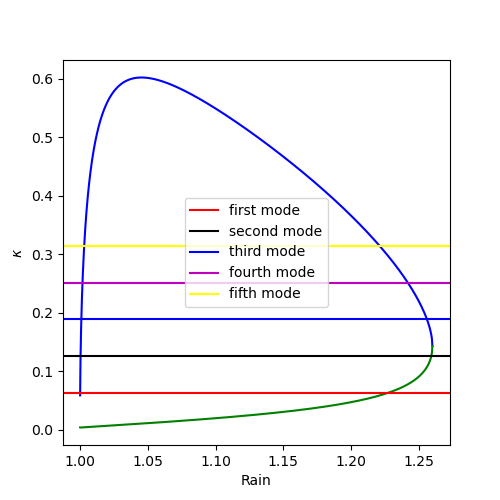

In [21]:
kappa=np.flip(np.loadtxt('Guesses1.dat'),axis=0)

L=100

valmin = 1.000119
valmax = 1.02
n_lmb=5
R=find_kappa_U(L,n_lmb,valmin,valmax,kappa)
print(R)
#R2=find_kappa_U(L,3,valmin,valmax,kappa)
#print(R2)


N=100
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.plot(kappa[:,0],kappa[:,1],'b')
ax.plot(kappa[:,0],kappa[:,2],'g')
ax.axhline(2*np.pi/L,color='r',label='first mode')
ax.axhline(2*2*np.pi/L,color='k',label='second mode')
ax.axhline(3*2*np.pi/L,color='b',label='third mode')
ax.axhline(4*2*np.pi/L,color='m',label='fourth mode')
ax.axhline(5*2*np.pi/L,color='yellow',label='fifth mode')
ax.legend()
ax.set_xlabel('Rain')
ax.set_ylabel(r'$\kappa$')

99.99999999951731
0.3141592653604957


Text(0, 0.5, 'O')

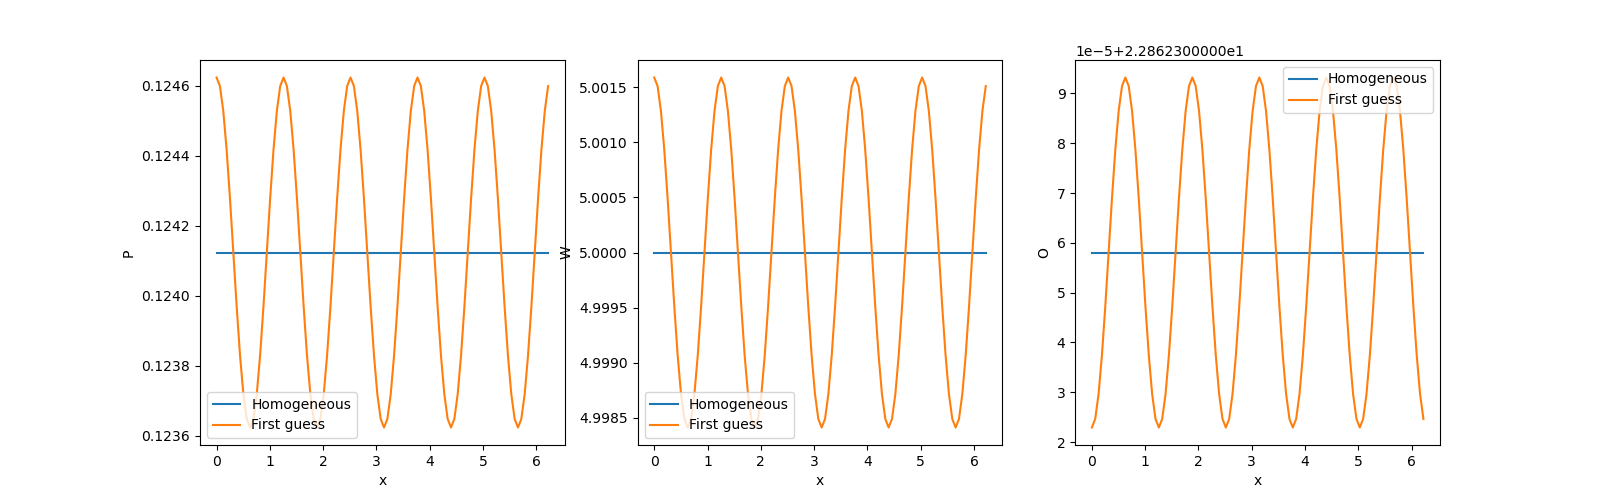

In [22]:
Rain,L,N,D2,x,Pg,Wg,Og,k = initialGuess(R,kappa,mode="U",n_lmb=n_lmb,eps=0.0005,N=N)
print(L)
print(k)
Ph,Wh,Oh=homogeneous(Rain)
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Ph*np.ones(N),label='Homogeneous')
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wh*np.ones(N),label='Homogeneous')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Oh*np.ones(N),label='Homogeneous')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

In [23]:
Rain,L,N,D2,x,Pg,Wg,Og,k = initialGuess(R,kappa,mode="U",n_lmb=n_lmb,eps=0.01,N=N)
mode='five'
Rain = Rain-0.0001
Pg=Pg
print(L)
#Ph,Wh,Oh = homogeneous(Rain)
eps_newton = 0.01; # initial ϵ_newton
for it in range(600):
    Pnew,Wnew,Onew = newton(L,N,Rain,Pg,Wg,Og,eps_newton,param)
    delta_list = [np.max(np.abs(Pnew - Pg)),np.max(np.abs(Wnew - Wg)),np.max(np.abs(Onew - Og))]
    max_update = np.max(delta_list)
    source = static_eqs(L,N,Rain,Pnew,Wnew,Onew,param)
    max_source = np.abs(np.sum(source)/(3*N))
    if max_update < 1e-6 and max_source < 1e-10:
        print(max_update, max_source)
        break
    elif it>=30 and max_update<0.1:
        eps_newton = 0.1
    elif it>=50 and max_update<0.01:
        eps_newton = 1.0
    #elseif it>=50 && max_update<0.001
    #    ϵ_newton = 1.1
    elif max_update > 10:
        print(max_update, max_source)
        print("failed")
        break
    Pg, Wg, Og = Pnew, Wnew, Onew

99.99999999951731
1.58740604661034e-07 9.398546962898322e-11


1.0030030970159787


Text(0, 0.5, 'O')

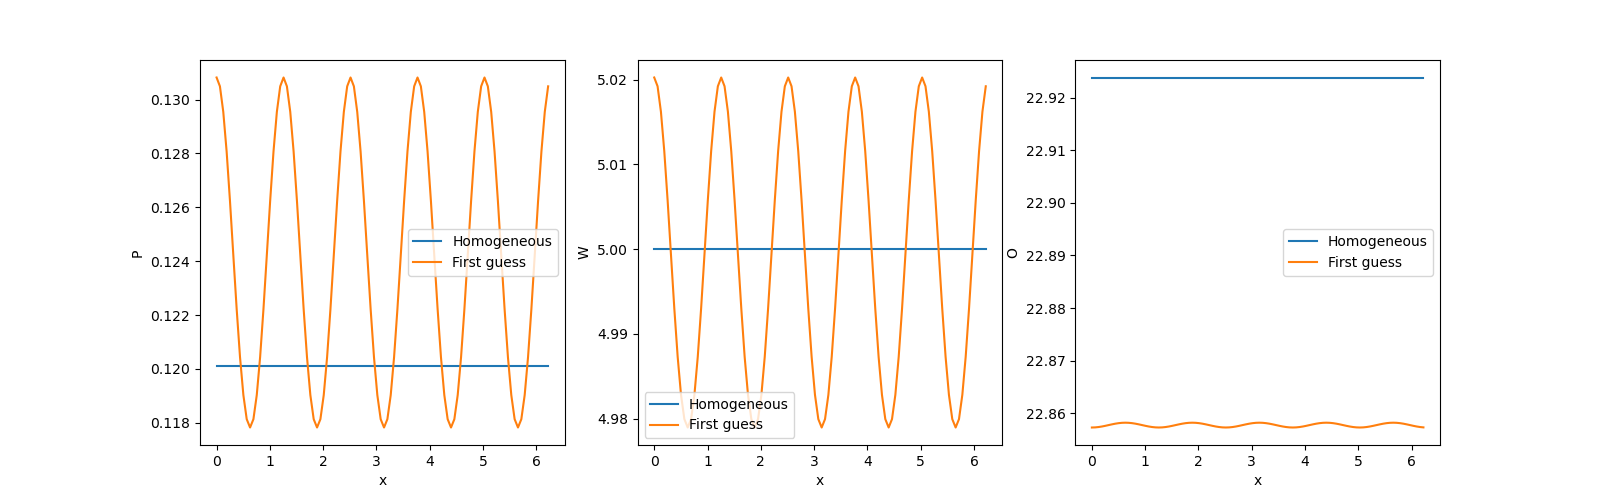

In [24]:
Ph,Wh,Oh=homogeneous(Rain)
print(Rain)
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Ph*np.ones(N),label='Homogeneous')
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wh*np.ones(N),label='Homogeneous')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Oh*np.ones(N),label='Homogeneous')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

In [25]:
Rain = Rain-0.0001
#Pg=P
#Wg=W
#Og=O

sols = [[Rain,Pg,Wg,Og]]
while Rain > 0.77:
    Rain = Rain-0.01
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og)
    sols.append([Rain,Pg,Wg,Og])


99.99999999951731


()

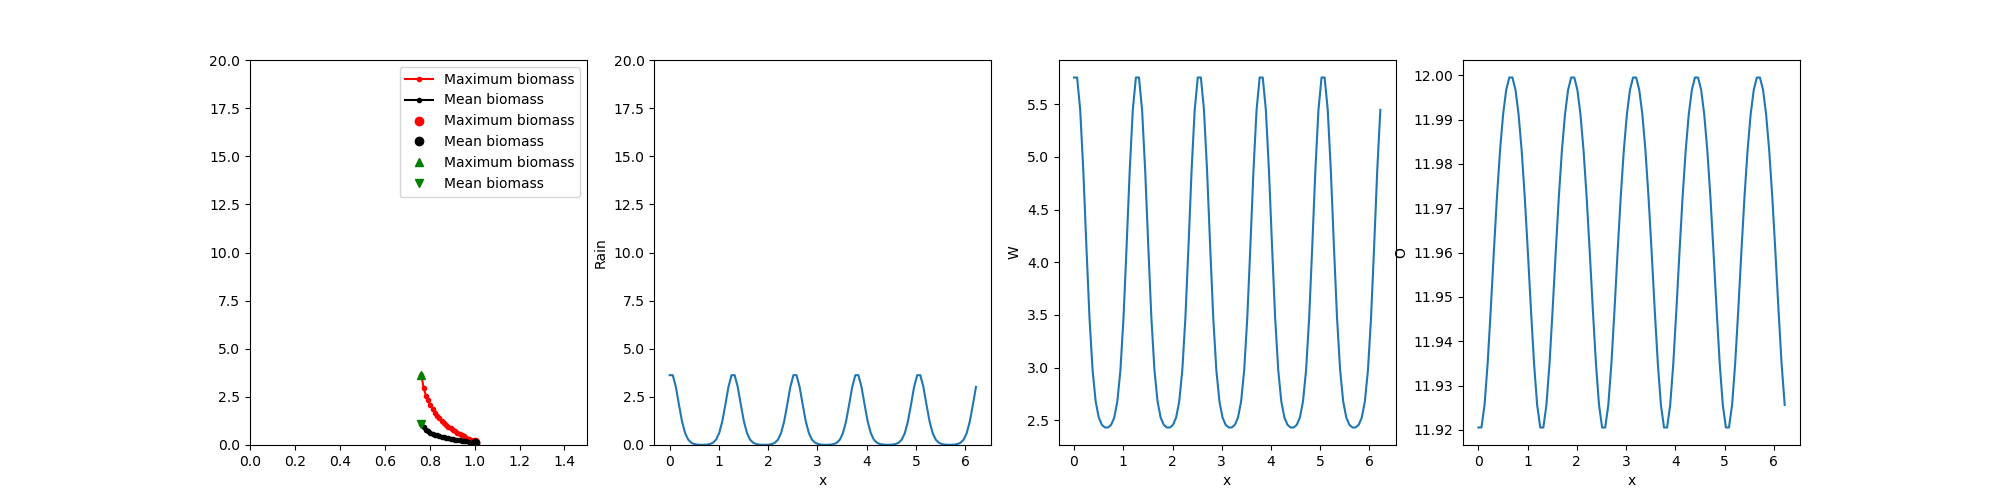

In [26]:
plot_sols(sols,-1)

In [27]:
save_RvsPWO(sols,'sols1','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','O',mode+'R0',int(np.round(L)))

In [28]:
Rain,Pg,Wg,Og = sols[-1]
Rain = Rain + 0.001
Pg = Pg + 4.5
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols2 = [[Rain,Pnew,Wnew,Onew]]


0.7639030970159785


In [29]:
Rain,Pg,Wg,Og = sols2[0]
while Rain < 1.21:
    Rain = Rain+0.01
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols2.append([Rain,Pg,Wg,Og])


99.99999999951731


()

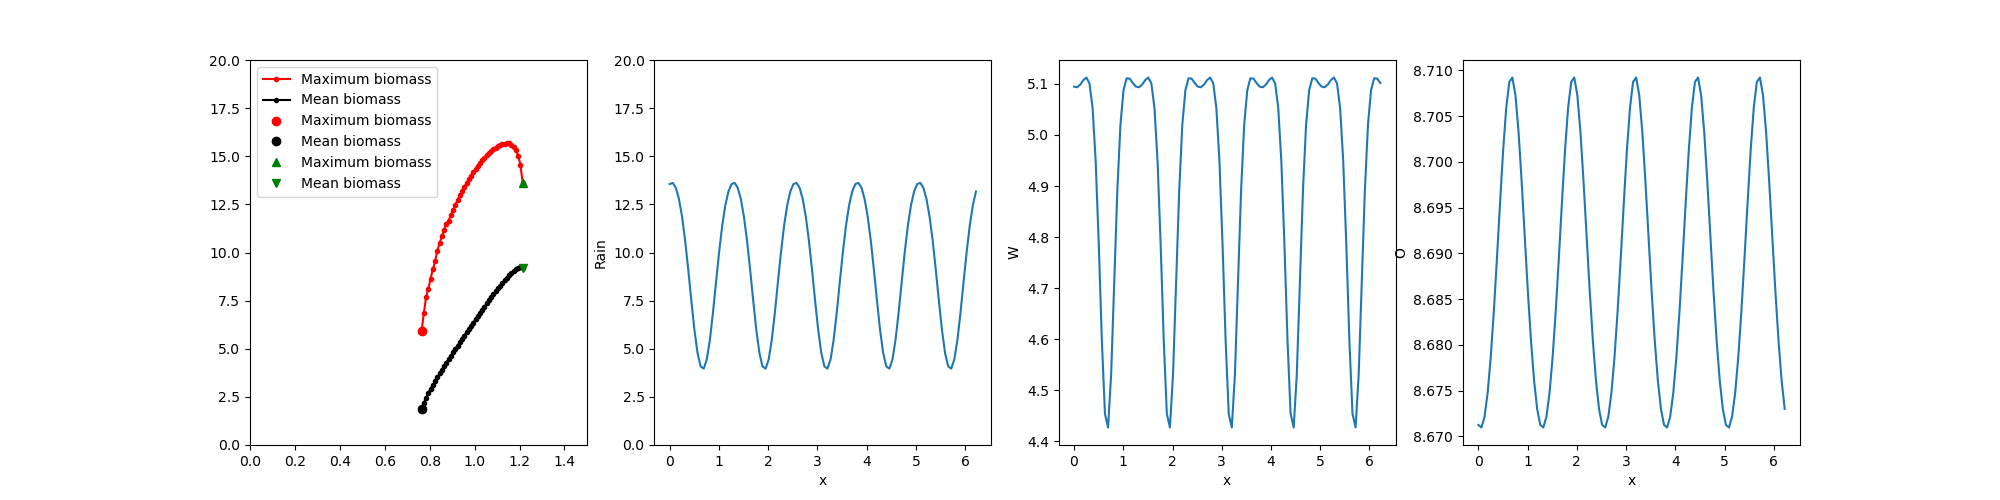

In [30]:
plot_sols(sols2,-1)

In [31]:
save_RvsPWO(sols2,'sols2','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','O',mode+'R0',int(np.round(L)))

In [32]:
Rain,Pg,Wg,Og = sols2[-1]
Rain = Rain - 0.000
Pg = Pg -0
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols3 = [[Rain,Pnew,Wnew,Onew]]


1.2139030970159788


In [33]:
Rain,Pg,Wg,Og = sols3[0]
while Rain < 1.22:
    Rain = Rain+0.0001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols3.append([Rain,Pg,Wg,Og])


99.99999999951731


()

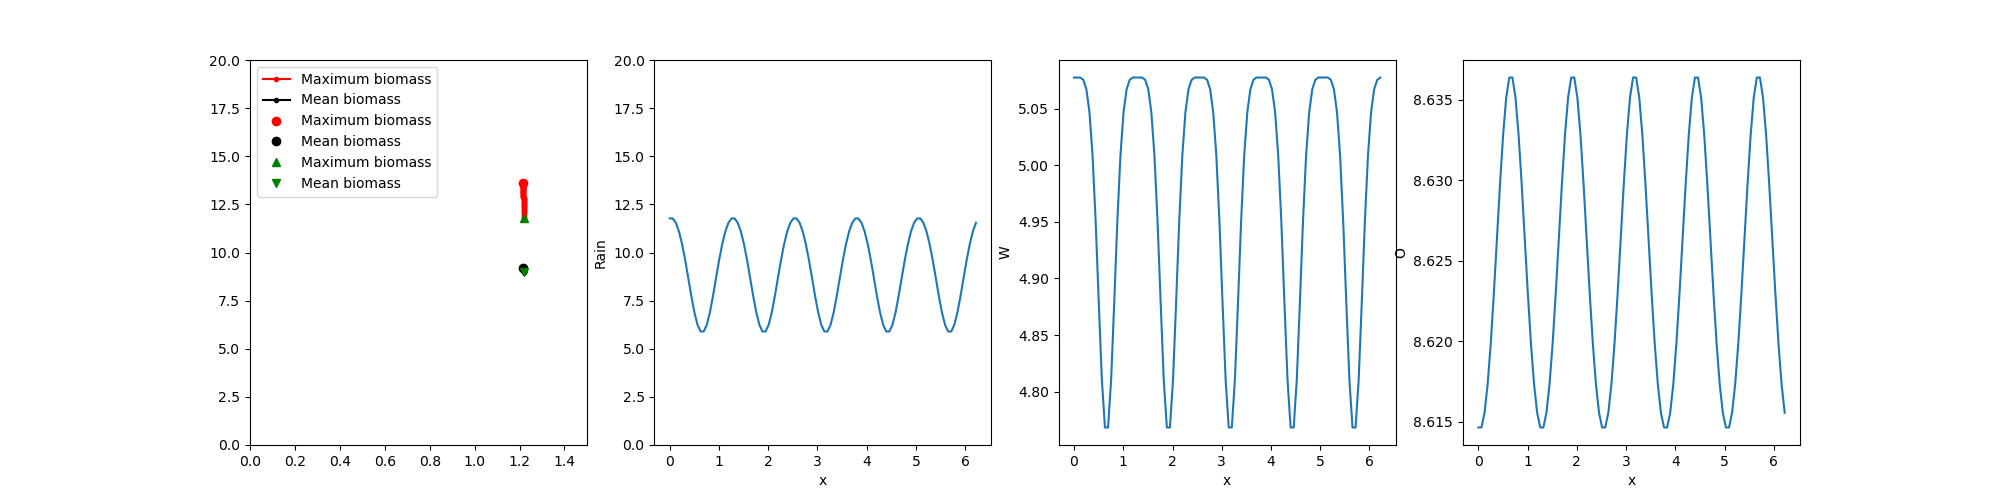

In [34]:
plot_sols(sols3,-1)

In [35]:
save_RvsPWO(sols3,'sols3','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols3,'sols3','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols3,'sols3','O',mode+'R0',int(np.round(L)))

In [36]:
Rain,Pg,Wg,Og = sols3[-1]
Rain = Rain - 0.000
Pg = Pg -0
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols4 = [[Rain,Pnew,Wnew,Onew]]


1.220003097015978


In [37]:
Rain,Pg,Wg,Og = sols4[0]
while Rain < 1.220965:
    Rain = Rain+0.000001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols4.append([Rain,Pg,Wg,Og])


99.99999999951731


()

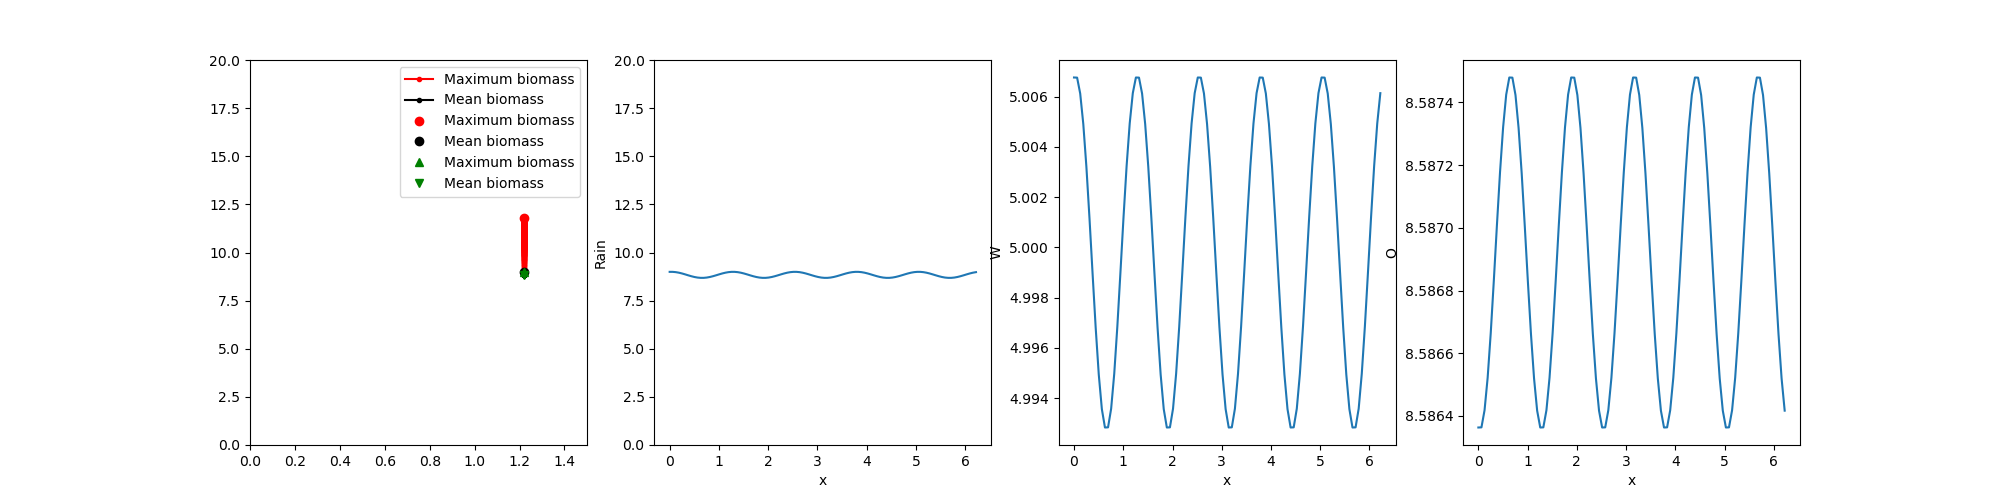

In [38]:
plot_sols(sols4,-1)

In [39]:
save_RvsPWO(sols4,'sols4','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols4,'sols4','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols4,'sols4','O',mode+'R0',int(np.round(L)))

### Sixth mode with low rainfall

1.0049301942994933


Text(0, 0.5, '$\\kappa$')

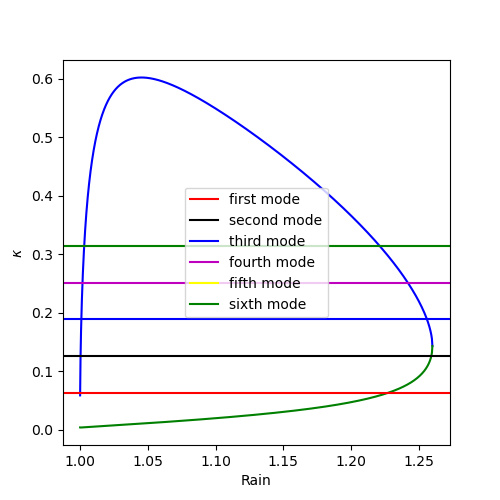

In [351]:
kappa=np.flip(np.loadtxt('Guesses1.dat'),axis=0)

L=100

valmin = 1.000119
valmax = 1.02
n_lmb=6
R=find_kappa_U(L,n_lmb,valmin,valmax,kappa)
print(R)
#R2=find_kappa_U(L,3,valmin,valmax,kappa)
#print(R2)


N=100
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.plot(kappa[:,0],kappa[:,1],'b')
ax.plot(kappa[:,0],kappa[:,2],'g')
ax.axhline(2*np.pi/L,color='r',label='first mode')
ax.axhline(2*2*np.pi/L,color='k',label='second mode')
ax.axhline(3*2*np.pi/L,color='b',label='third mode')
ax.axhline(4*2*np.pi/L,color='m',label='fourth mode')
ax.axhline(5*2*np.pi/L,color='yellow',label='fifth mode')
ax.axhline(5*2*np.pi/L,color='green',label='sixth mode')
ax.legend()
ax.set_xlabel('Rain')
ax.set_ylabel(r'$\kappa$')

100.0000000004224
0.37699111842918276


Text(0, 0.5, 'O')

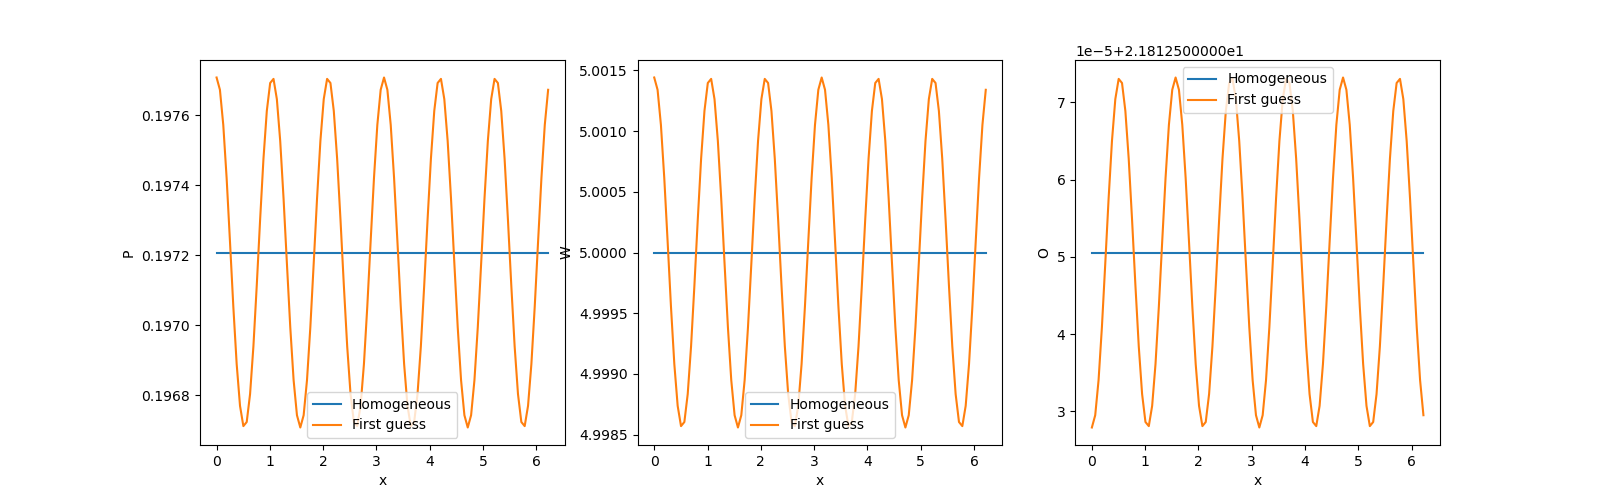

In [352]:
Rain,L,N,D2,x,Pg,Wg,Og,k = initialGuess(R,kappa,mode="U",n_lmb=n_lmb,eps=0.0005,N=N)
print(L)
print(k)
Ph,Wh,Oh=homogeneous(Rain)
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Ph*np.ones(N),label='Homogeneous')
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wh*np.ones(N),label='Homogeneous')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Oh*np.ones(N),label='Homogeneous')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

In [353]:
Rain,L,N,D2,x,Pg,Wg,Og,k = initialGuess(R,kappa,mode="U",n_lmb=n_lmb,eps=0.01,N=N)
mode='six'
Rain = Rain-0.0001
Pg=Pg
print(L)
#Ph,Wh,Oh = homogeneous(Rain)
eps_newton = 0.01; # initial ϵ_newton
for it in range(600):
    Pnew,Wnew,Onew = newton(L,N,Rain,Pg,Wg,Og,eps_newton,param)
    delta_list = [np.max(np.abs(Pnew - Pg)),np.max(np.abs(Wnew - Wg)),np.max(np.abs(Onew - Og))]
    max_update = np.max(delta_list)
    source = static_eqs(L,N,Rain,Pnew,Wnew,Onew,param)
    max_source = np.abs(np.sum(source)/(3*N))
    if max_update < 1e-6 and max_source < 1e-10:
        print(max_update, max_source)
        break
    elif it>=30 and max_update<0.1:
        eps_newton = 0.1
    elif it>=50 and max_update<0.01:
        eps_newton = 1.0
    #elseif it>=50 && max_update<0.001
    #    ϵ_newton = 1.1
    elif max_update > 10:
        print(max_update, max_source)
        print("failed")
        break
    Pg, Wg, Og = Pnew, Wnew, Onew

100.0000000004224
4.2348654716306555e-07 9.43395303097214e-11


1.0048301942994933


Text(0, 0.5, 'O')

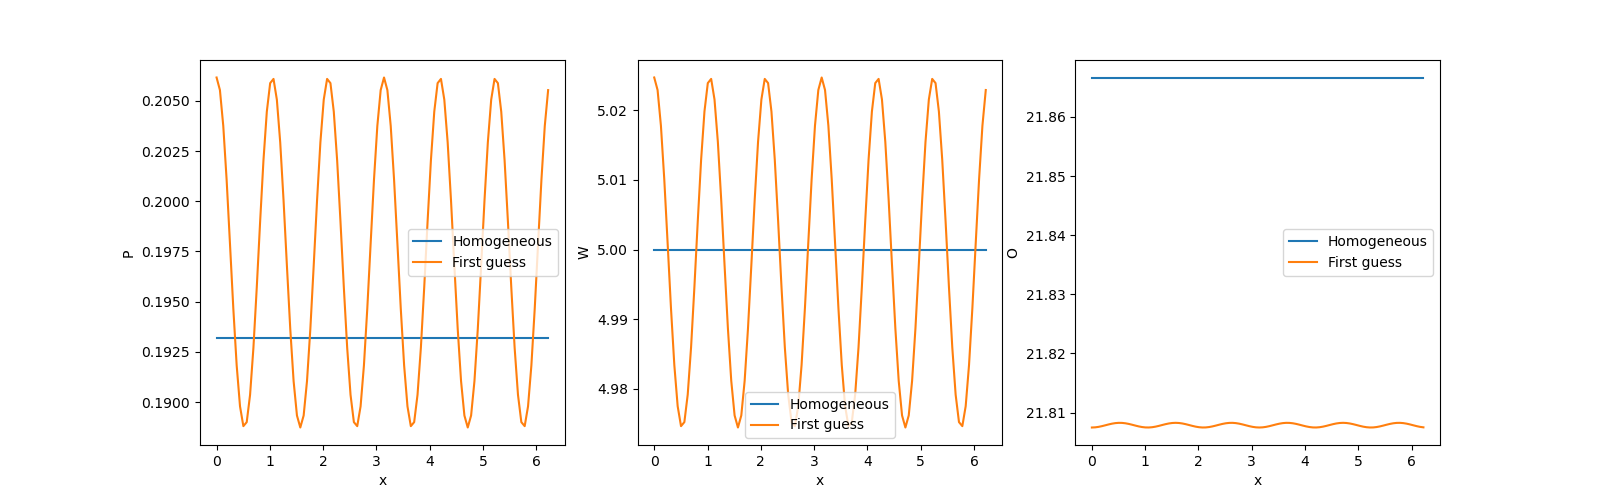

In [354]:
Ph,Wh,Oh=homogeneous(Rain)
print(Rain)
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Ph*np.ones(N),label='Homogeneous')
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wh*np.ones(N),label='Homogeneous')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Oh*np.ones(N),label='Homogeneous')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

In [355]:
Rain = Rain-0.0001
#Pg=P
#Wg=W
#Og=O

sols = [[Rain,Pg,Wg,Og]]
while Rain > 0.83:
    Rain = Rain-0.01
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og)
    sols.append([Rain,Pg,Wg,Og])


100.0000000004224


()

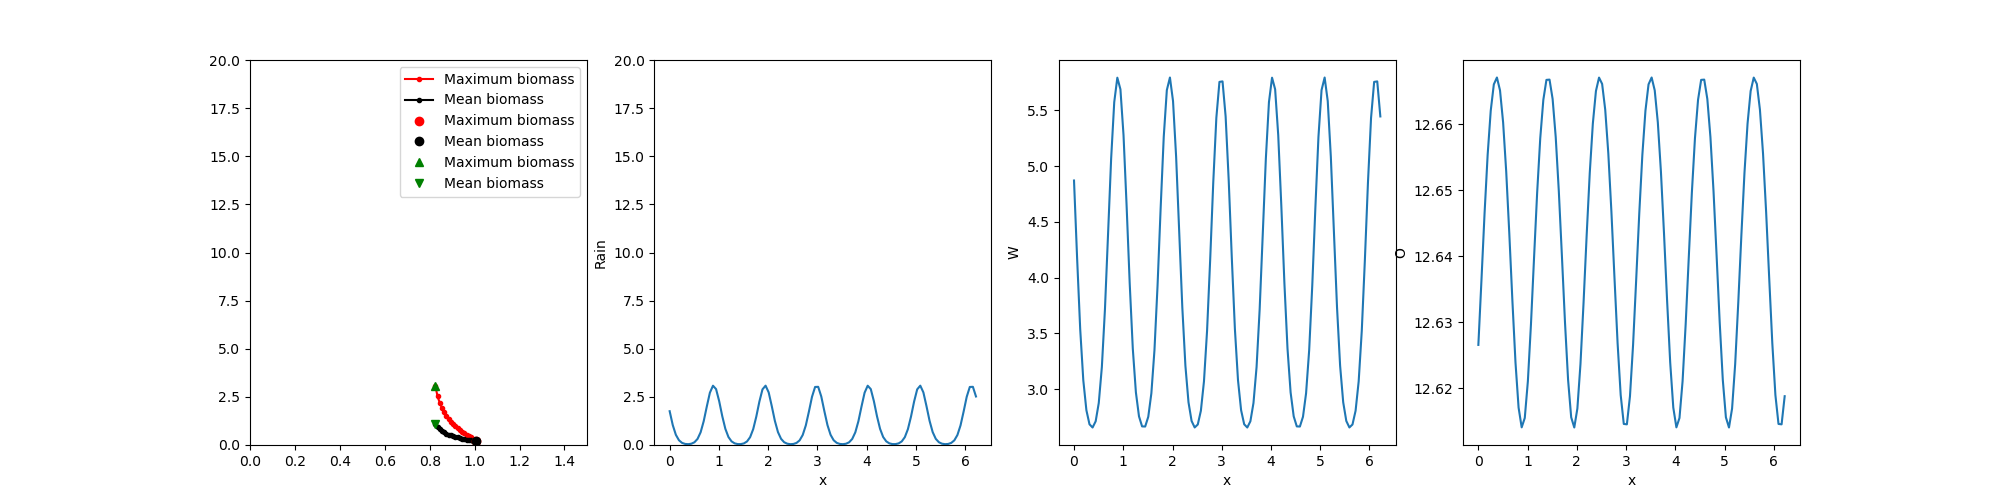

In [356]:
plot_sols(sols,-1)


In [357]:
save_RvsPWO(sols,'sols1','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','O',mode+'R0',int(np.round(L)))

In [364]:
Rain,Pg,Wg,Og = sols[-1]
Rain = Rain + 0.00
Pg = Pg + 0.0
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols2 = [[Rain,Pnew,Wnew,Onew]]


0.8247301942994931


In [365]:
Rain,Pg,Wg,Og = sols2[0]
while Rain > 0.8185:
    Rain = Rain-0.0001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
    sols2.append([Rain,Pg,Wg,Og])


100.0000000004224


()

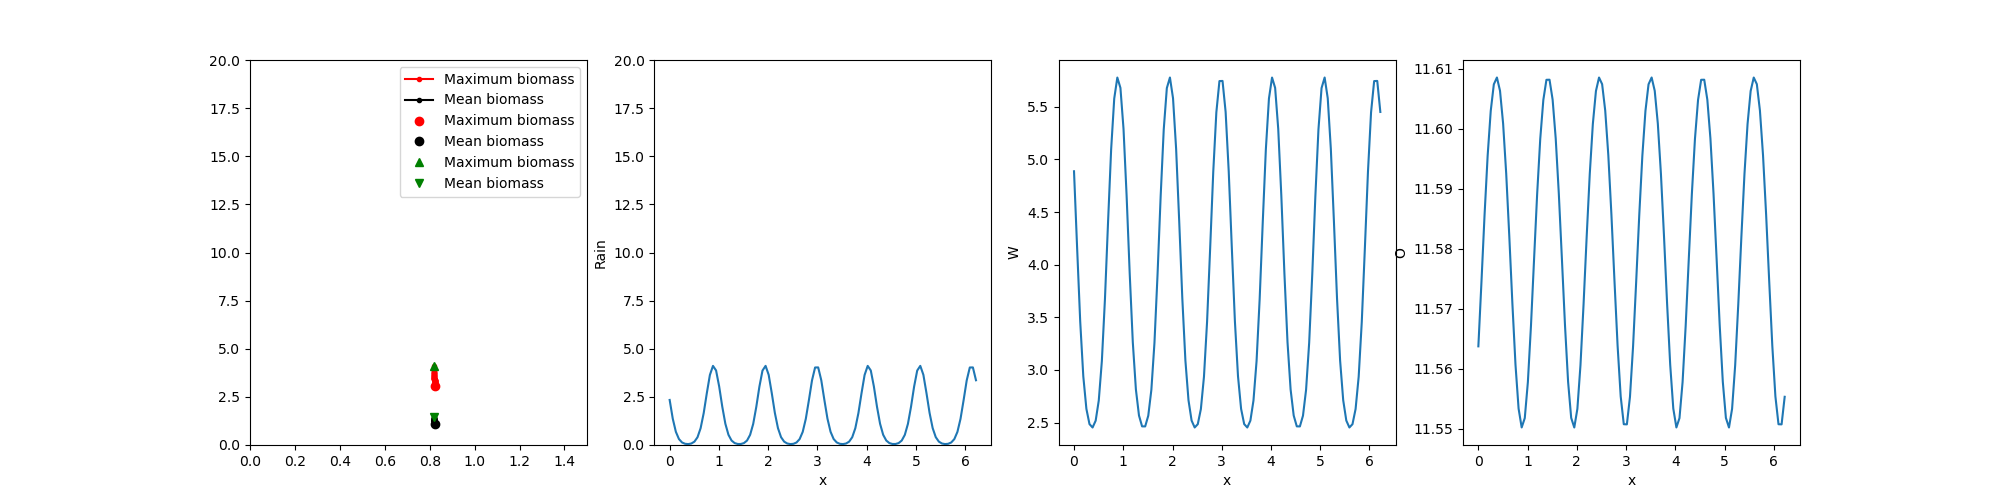

In [366]:
plot_sols(sols2,-1)

In [367]:
save_RvsPWO(sols2,'sols2','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','O',mode+'R0',int(np.round(L)))

In [381]:
Rain,Pg,Wg,Og = sols2[-1]
Rain = Rain + 0.0001
Pg = Pg+0.5
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols3 = [[Rain,Pnew,Wnew,Onew]]


0.8185301942994938


In [382]:
Rain,Pg,Wg,Og = sols3[0]
while Rain < 1.18:
    Rain = Rain+0.01
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols3.append([Rain,Pg,Wg,Og])


100.0000000004224


()

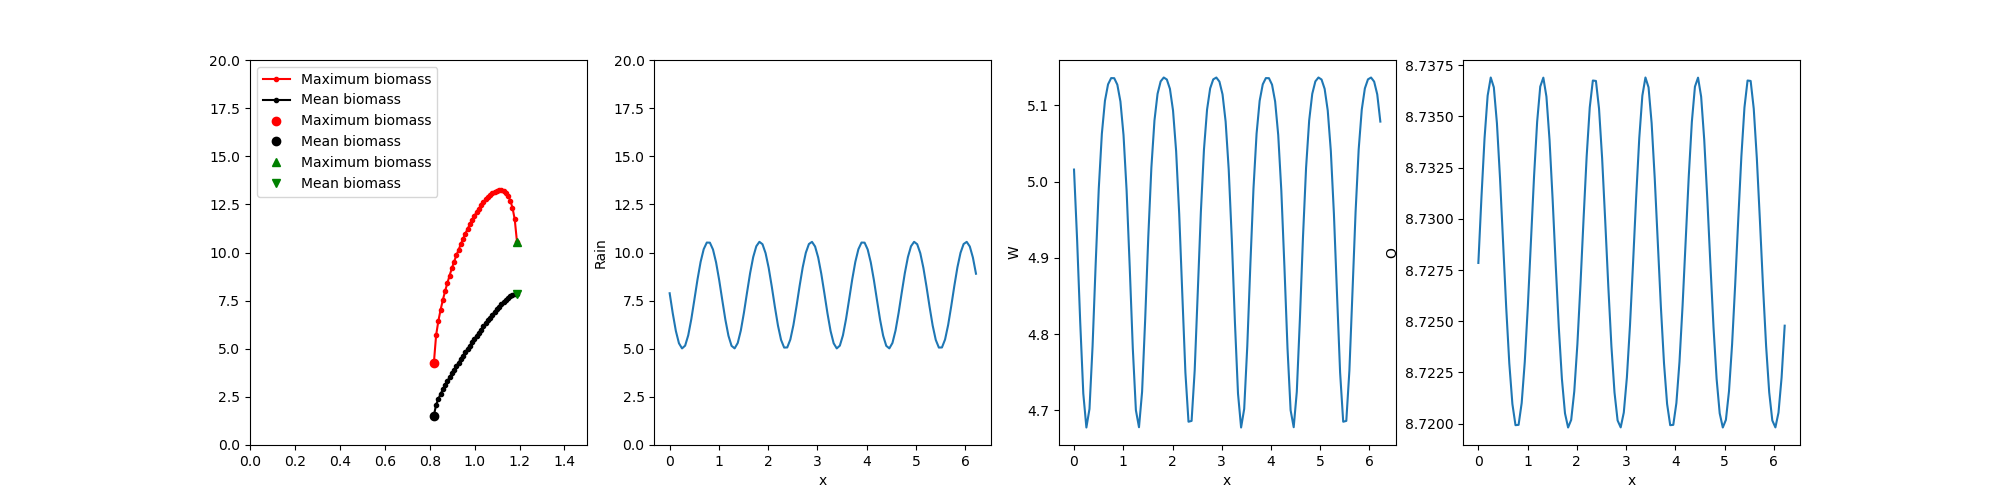

In [383]:
plot_sols(sols3,-1)

In [384]:
save_RvsPWO(sols3,'sols3','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols3,'sols3','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols3,'sols3','O',mode+'R0',int(np.round(L)))

In [389]:
Rain,Pg,Wg,Og = sols3[-1]
Rain = Rain + 0.000
Pg = Pg+0.0
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols4 = [[Rain,Pnew,Wnew,Onew]]


1.1885301942994941


In [390]:
Rain,Pg,Wg,Og = sols4[0]
while Rain < 1.1948:
    Rain = Rain+0.0001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols4.append([Rain,Pg,Wg,Og])


100.0000000004224


()

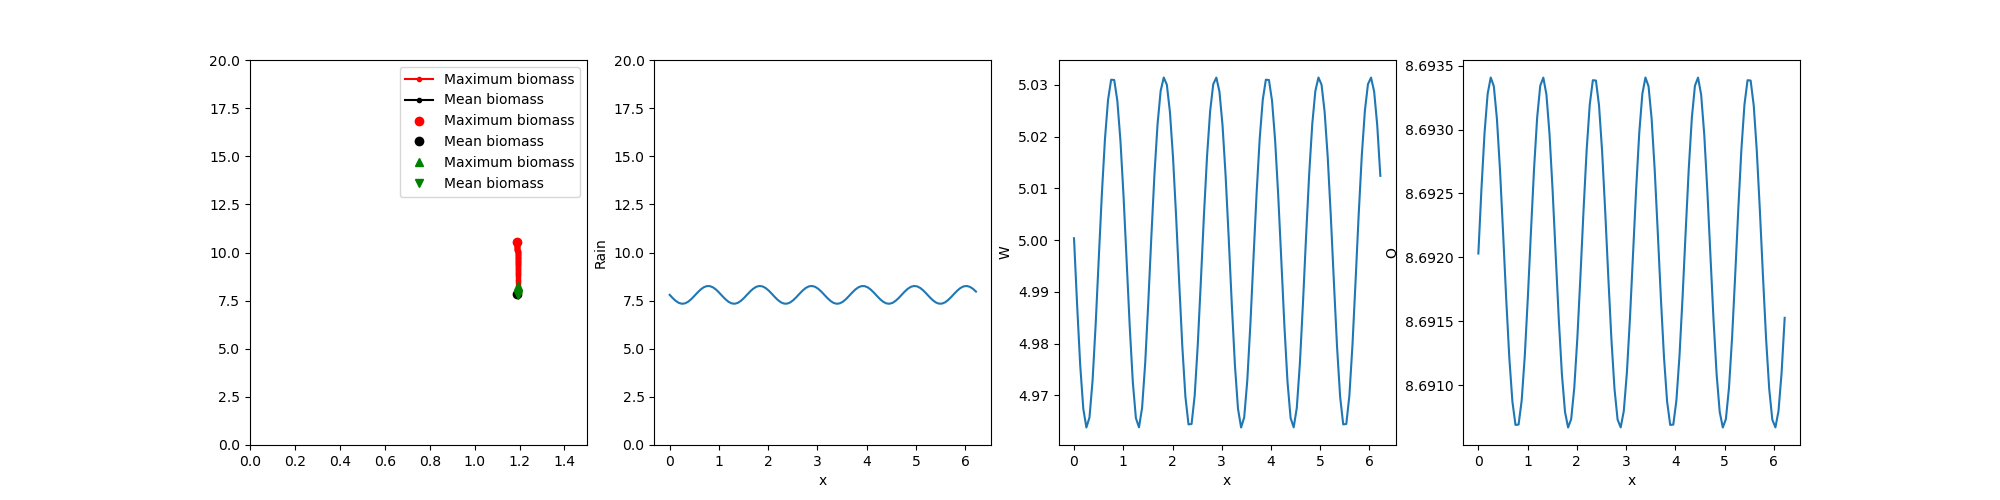

In [392]:
plot_sols(sols4,-1)

In [393]:
save_RvsPWO(sols4,'sols4','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols4,'sols4','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols4,'sols4','O',mode+'R0',int(np.round(L)))

In [399]:
Rain,Pg,Wg,Og = sols4[-1]
Rain = Rain + 0.000
Pg = Pg+0.0
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols5 = [[Rain,Pnew,Wnew,Onew]]


1.1948301942994934


In [ ]:
Rain,Pg,Wg,Og = sols5[0]
while Rain < 1.9497:
    Rain = Rain+0.00001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols5.append([Rain,Pg,Wg,Og])


failed, Rain=1.1949901942994945
failed, Rain=1.1950001942994946
failed, Rain=1.1950101942994946
failed, Rain=1.1950201942994947
failed, Rain=1.1950301942994948
failed, Rain=1.1950401942994948
failed, Rain=1.1950501942994949
failed, Rain=1.195060194299495
failed, Rain=1.195070194299495
failed, Rain=1.195080194299495
failed, Rain=1.1950901942994951
failed, Rain=1.1951001942994952
failed, Rain=1.1951101942994953
failed, Rain=1.1951201942994953
failed, Rain=1.1951301942994954
failed, Rain=1.1951401942994955
failed, Rain=1.1951501942994955
failed, Rain=1.1951601942994956
failed, Rain=1.1951701942994957
failed, Rain=1.1951801942994957
failed, Rain=1.1951901942994958
failed, Rain=1.1952001942994959
failed, Rain=1.195210194299496
failed, Rain=1.195220194299496
failed, Rain=1.195230194299496
failed, Rain=1.1952401942994961
failed, Rain=1.1952501942994962
failed, Rain=1.1952601942994963
failed, Rain=1.1952701942994963
failed, Rain=1.1952801942994964
failed, Rain=1.1952901942994965
failed, Rain=1

failed, Rain=1.1975901942995115
failed, Rain=1.1976001942995116
failed, Rain=1.1976101942995117
failed, Rain=1.1976201942995117
failed, Rain=1.1976301942995118
failed, Rain=1.1976401942995119
failed, Rain=1.197650194299512
failed, Rain=1.197660194299512
failed, Rain=1.197670194299512
failed, Rain=1.1976801942995121
failed, Rain=1.1976901942995122
failed, Rain=1.1977001942995122
failed, Rain=1.1977101942995123
failed, Rain=1.1977201942995124
failed, Rain=1.1977301942995124
failed, Rain=1.1977401942995125
failed, Rain=1.1977501942995126
failed, Rain=1.1977601942995126
failed, Rain=1.1977701942995127
failed, Rain=1.1977801942995128
failed, Rain=1.1977901942995128
failed, Rain=1.197800194299513
failed, Rain=1.197810194299513
failed, Rain=1.197820194299513
failed, Rain=1.197830194299513
failed, Rain=1.1978401942995132
failed, Rain=1.1978501942995132
failed, Rain=1.1978601942995133
failed, Rain=1.1978701942995134
failed, Rain=1.1978801942995134
failed, Rain=1.1978901942995135
failed, Rain=1.

failed, Rain=1.2002101942995287
failed, Rain=1.2002201942995288
failed, Rain=1.2002301942995288
failed, Rain=1.2002401942995289
failed, Rain=1.200250194299529
failed, Rain=1.200260194299529
failed, Rain=1.200270194299529
failed, Rain=1.2002801942995291
failed, Rain=1.2002901942995292
failed, Rain=1.2003001942995293
failed, Rain=1.2003101942995293
failed, Rain=1.2003201942995294
failed, Rain=1.2003301942995295
failed, Rain=1.2003401942995295
failed, Rain=1.2003501942995296
failed, Rain=1.2003601942995297
failed, Rain=1.2003701942995297
failed, Rain=1.2003801942995298
failed, Rain=1.2003901942995299
failed, Rain=1.20040019429953
failed, Rain=1.20041019429953
failed, Rain=1.20042019429953
failed, Rain=1.2004301942995301
failed, Rain=1.2004401942995302
failed, Rain=1.2004501942995303
failed, Rain=1.2004601942995303
failed, Rain=1.2004701942995304
failed, Rain=1.2004801942995305
failed, Rain=1.2004901942995305
failed, Rain=1.2005001942995306
failed, Rain=1.2005101942995307
failed, Rain=1.20

failed, Rain=1.202860194299546
failed, Rain=1.2028701942995461
failed, Rain=1.2028801942995462
failed, Rain=1.2028901942995462
failed, Rain=1.2029001942995463
failed, Rain=1.2029101942995464
failed, Rain=1.2029201942995464
failed, Rain=1.2029301942995465
failed, Rain=1.2029401942995466
failed, Rain=1.2029501942995466
failed, Rain=1.2029601942995467
failed, Rain=1.2029701942995468
failed, Rain=1.2029801942995468
failed, Rain=1.202990194299547
failed, Rain=1.203000194299547
failed, Rain=1.203010194299547
failed, Rain=1.203020194299547
failed, Rain=1.2030301942995472
failed, Rain=1.2030401942995472
failed, Rain=1.2030501942995473
failed, Rain=1.2030601942995474
failed, Rain=1.2030701942995474
failed, Rain=1.2030801942995475
failed, Rain=1.2030901942995476
failed, Rain=1.2031001942995476
failed, Rain=1.2031101942995477
failed, Rain=1.2031201942995478
failed, Rain=1.2031301942995478
failed, Rain=1.2031401942995479
failed, Rain=1.203150194299548
failed, Rain=1.203160194299548
failed, Rain=1.

failed, Rain=1.2055101942995634
failed, Rain=1.2055201942995635
failed, Rain=1.2055301942995635
failed, Rain=1.2055401942995636
failed, Rain=1.2055501942995637
failed, Rain=1.2055601942995637
failed, Rain=1.2055701942995638
failed, Rain=1.2055801942995639
failed, Rain=1.205590194299564
failed, Rain=1.205600194299564
failed, Rain=1.205610194299564
failed, Rain=1.2056201942995641
failed, Rain=1.2056301942995642
failed, Rain=1.2056401942995643
failed, Rain=1.2056501942995643
failed, Rain=1.2056601942995644
failed, Rain=1.2056701942995645
failed, Rain=1.2056801942995645
failed, Rain=1.2056901942995646
failed, Rain=1.2057001942995647
failed, Rain=1.2057101942995647
failed, Rain=1.2057201942995648
failed, Rain=1.2057301942995649
failed, Rain=1.205740194299565
failed, Rain=1.205750194299565
failed, Rain=1.205760194299565
failed, Rain=1.2057701942995651
failed, Rain=1.2057801942995652
failed, Rain=1.2057901942995652
failed, Rain=1.2058001942995653
failed, Rain=1.2058101942995654
failed, Rain=1

failed, Rain=1.2081701942995808
failed, Rain=1.208180194299581
failed, Rain=1.208190194299581
failed, Rain=1.208200194299581
failed, Rain=1.208210194299581
failed, Rain=1.2082201942995812
failed, Rain=1.2082301942995812
failed, Rain=1.2082401942995813
failed, Rain=1.2082501942995814
failed, Rain=1.2082601942995814
failed, Rain=1.2082701942995815
failed, Rain=1.2082801942995816
failed, Rain=1.2082901942995816
failed, Rain=1.2083001942995817
failed, Rain=1.2083101942995818
failed, Rain=1.2083201942995818
failed, Rain=1.2083301942995819
failed, Rain=1.208340194299582
failed, Rain=1.208350194299582
failed, Rain=1.208360194299582
failed, Rain=1.2083701942995821
failed, Rain=1.2083801942995822
failed, Rain=1.2083901942995823
failed, Rain=1.2084001942995823
failed, Rain=1.2084101942995824
failed, Rain=1.2084201942995825
failed, Rain=1.2084301942995825
failed, Rain=1.2084401942995826
failed, Rain=1.2084501942995827
failed, Rain=1.2084601942995827
failed, Rain=1.2084701942995828
failed, Rain=1.

failed, Rain=1.2108201942995982
failed, Rain=1.2108301942995983
failed, Rain=1.2108401942995983
failed, Rain=1.2108501942995984
failed, Rain=1.2108601942995985
failed, Rain=1.2108701942995985
failed, Rain=1.2108801942995986
failed, Rain=1.2108901942995987
failed, Rain=1.2109001942995987
failed, Rain=1.2109101942995988
failed, Rain=1.2109201942995989
failed, Rain=1.210930194299599
failed, Rain=1.210940194299599
failed, Rain=1.210950194299599
failed, Rain=1.2109601942995991
failed, Rain=1.2109701942995992
failed, Rain=1.2109801942995992
failed, Rain=1.2109901942995993
failed, Rain=1.2110001942995994
failed, Rain=1.2110101942995994
failed, Rain=1.2110201942995995
failed, Rain=1.2110301942995996
failed, Rain=1.2110401942995996
failed, Rain=1.2110501942995997
failed, Rain=1.2110601942995998
failed, Rain=1.2110701942995998
failed, Rain=1.2110801942996
failed, Rain=1.2110901942996
failed, Rain=1.2111001942996
failed, Rain=1.2111101942996
failed, Rain=1.2111201942996002
failed, Rain=1.21113019

failed, Rain=1.2134601942996155
failed, Rain=1.2134701942996156
failed, Rain=1.2134801942996156
failed, Rain=1.2134901942996157
failed, Rain=1.2135001942996158
failed, Rain=1.2135101942996158
failed, Rain=1.2135201942996159
failed, Rain=1.213530194299616
failed, Rain=1.213540194299616
failed, Rain=1.213550194299616
failed, Rain=1.2135601942996161
failed, Rain=1.2135701942996162
failed, Rain=1.2135801942996163
failed, Rain=1.2135901942996163
failed, Rain=1.2136001942996164
failed, Rain=1.2136101942996165
failed, Rain=1.2136201942996165
failed, Rain=1.2136301942996166
failed, Rain=1.2136401942996167
failed, Rain=1.2136501942996167
failed, Rain=1.2136601942996168
failed, Rain=1.2136701942996169
failed, Rain=1.213680194299617
failed, Rain=1.213690194299617
failed, Rain=1.213700194299617
failed, Rain=1.2137101942996171
failed, Rain=1.2137201942996172
failed, Rain=1.2137301942996173
failed, Rain=1.2137401942996173
failed, Rain=1.2137501942996174
failed, Rain=1.2137601942996175
failed, Rain=1

In [ ]:
plot_sols(sols5,-1)

In [45]:
save_RvsPWO(sols5,'sols5','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols5,'sols5','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols5,'sols5','O',mode+'R0',int(np.round(L)))

### Seventh mode with low rainfall

1.0076780845080455


Text(0, 0.5, '$\\kappa$')

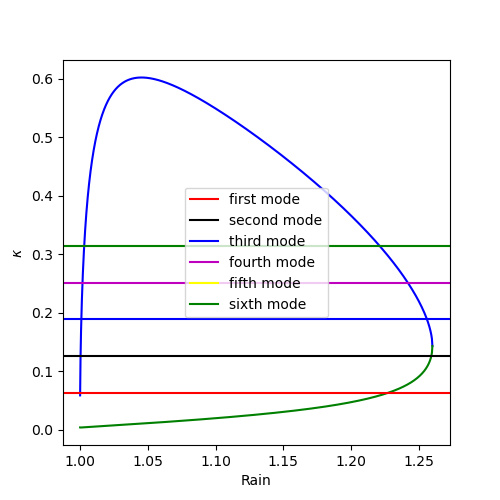

In [182]:
kappa=np.flip(np.loadtxt('Guesses1.dat'),axis=0)

L=100

valmin = 1.000119
valmax = 1.02
n_lmb=7
R=find_kappa_U(L,n_lmb,valmin,valmax,kappa)
print(R)
#R2=find_kappa_U(L,3,valmin,valmax,kappa)
#print(R2)


N=100
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.plot(kappa[:,0],kappa[:,1],'b')
ax.plot(kappa[:,0],kappa[:,2],'g')
ax.axhline(2*np.pi/L,color='r',label='first mode')
ax.axhline(2*2*np.pi/L,color='k',label='second mode')
ax.axhline(3*2*np.pi/L,color='b',label='third mode')
ax.axhline(4*2*np.pi/L,color='m',label='fourth mode')
ax.axhline(5*2*np.pi/L,color='yellow',label='fifth mode')
ax.axhline(5*2*np.pi/L,color='green',label='sixth mode')
ax.legend()
ax.set_xlabel('Rain')
ax.set_ylabel(r'$\kappa$')

100.00000000034545
0.43982297150105165


Text(0, 0.5, 'O')

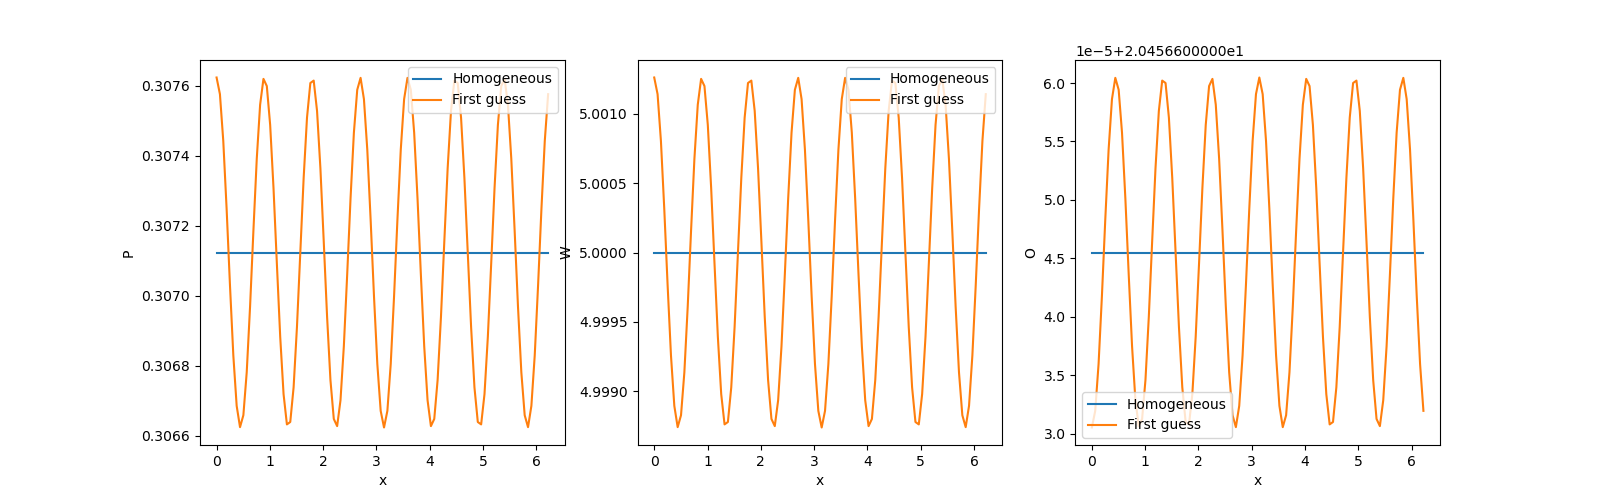

In [183]:
Rain,L,N,D2,x,Pg,Wg,Og,k = initialGuess(R,kappa,mode="U",n_lmb=n_lmb,eps=0.0005,N=N)
print(L)
print(k)
Ph,Wh,Oh=homogeneous(Rain)
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Ph*np.ones(N),label='Homogeneous')
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wh*np.ones(N),label='Homogeneous')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Oh*np.ones(N),label='Homogeneous')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

In [184]:
Rain,L,N,D2,x,Pg,Wg,Og,k = initialGuess(R,kappa,mode="U",n_lmb=n_lmb,eps=0.01,N=N)
mode='seven'
Rain = Rain-0.0001
Pg=Pg
print(L)
#Ph,Wh,Oh = homogeneous(Rain)
eps_newton = 0.01; # initial ϵ_newton
for it in range(600):
    Pnew,Wnew,Onew = newton(L,N,Rain,Pg,Wg,Og,eps_newton,param)
    delta_list = [np.max(np.abs(Pnew - Pg)),np.max(np.abs(Wnew - Wg)),np.max(np.abs(Onew - Og))]
    max_update = np.max(delta_list)
    source = static_eqs(L,N,Rain,Pnew,Wnew,Onew,param)
    max_source = np.abs(np.sum(source)/(3*N))
    if max_update < 1e-6 and max_source < 1e-10:
        print(max_update, max_source)
        break
    elif it>=30 and max_update<0.1:
        eps_newton = 0.1
    elif it>=50 and max_update<0.01:
        eps_newton = 1.0
    #elseif it>=50 && max_update<0.001
    #    ϵ_newton = 1.1
    elif max_update > 10:
        print(max_update, max_source)
        print("failed")
        break
    Pg, Wg, Og = Pnew, Wnew, Onew

100.00000000034545
8.567218250377096e-07 9.467651874850791e-11


1.0075780845080455


Text(0, 0.5, 'O')

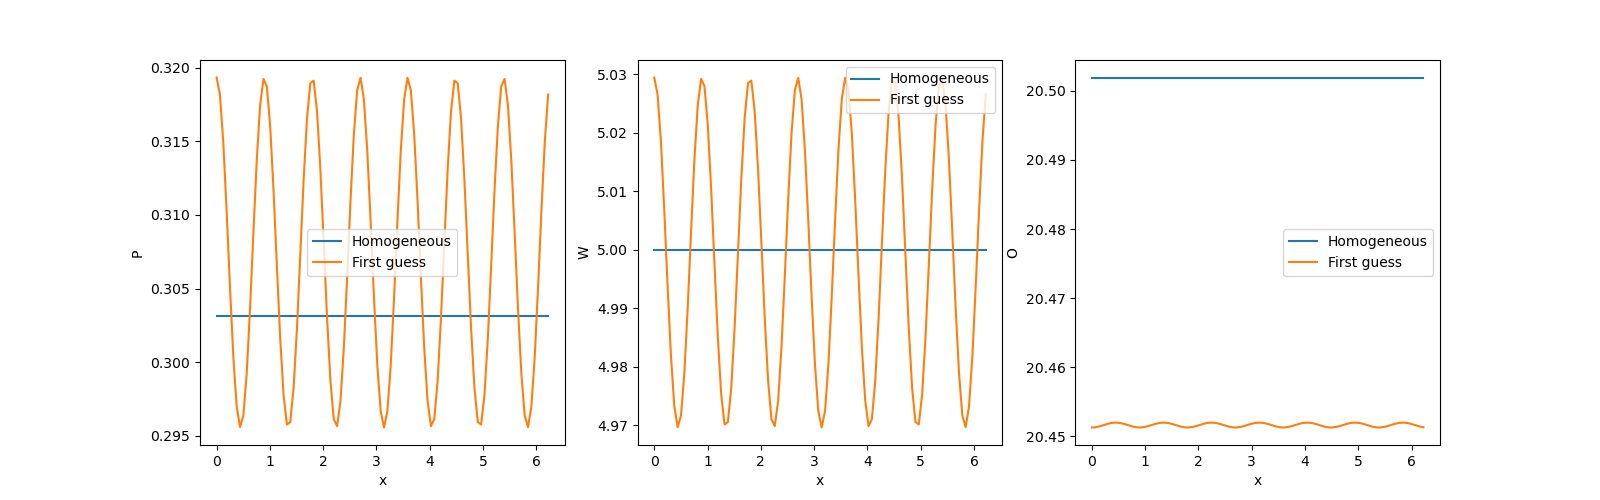

In [185]:
Ph,Wh,Oh=homogeneous(Rain)
print(Rain)
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Ph*np.ones(N),label='Homogeneous')
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wh*np.ones(N),label='Homogeneous')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Oh*np.ones(N),label='Homogeneous')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

In [186]:
Rain = Rain-0.0001
#Pg=P
#Wg=W
#Og=O

sols = [[Rain,Pg,Wg,Og]]
while Rain > 0.88:
    Rain = Rain-0.01
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og)
    sols.append([Rain,Pg,Wg,Og])


100.00000000034545


()

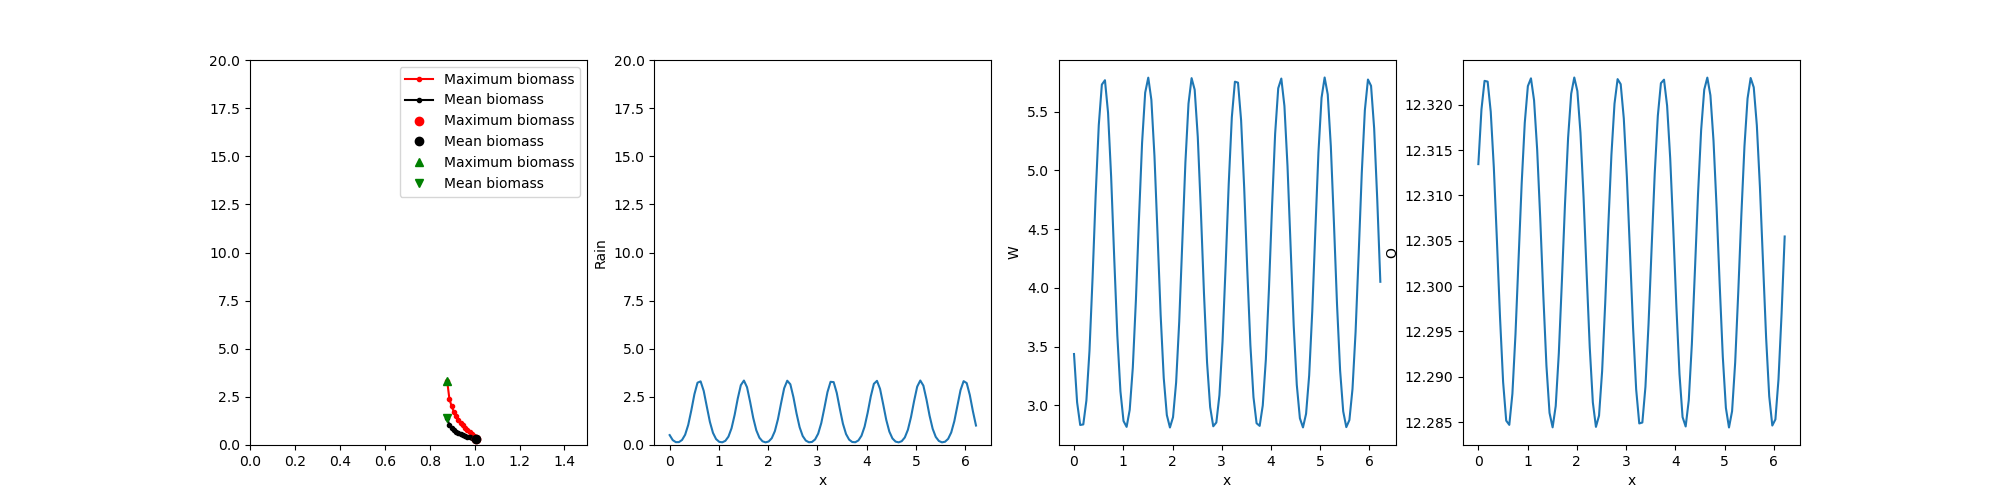

In [187]:
plot_sols(sols,-1)


In [188]:
save_RvsPWO(sols,'sols1','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','O',mode+'R0',int(np.round(L)))

In [250]:
Rain,Pg,Wg,Og = sols[-1]
Rain = Rain + 0.00
Pg = Pg + 0.0
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols2 = [[Rain,Pnew,Wnew,Onew]]


0.8774780845080454


In [251]:
Rain,Pg,Wg,Og = sols2[0]
while Rain > 0.8772:
    Rain = Rain-0.0001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
    sols2.append([Rain,Pg,Wg,Og])


100.00000000034545


()

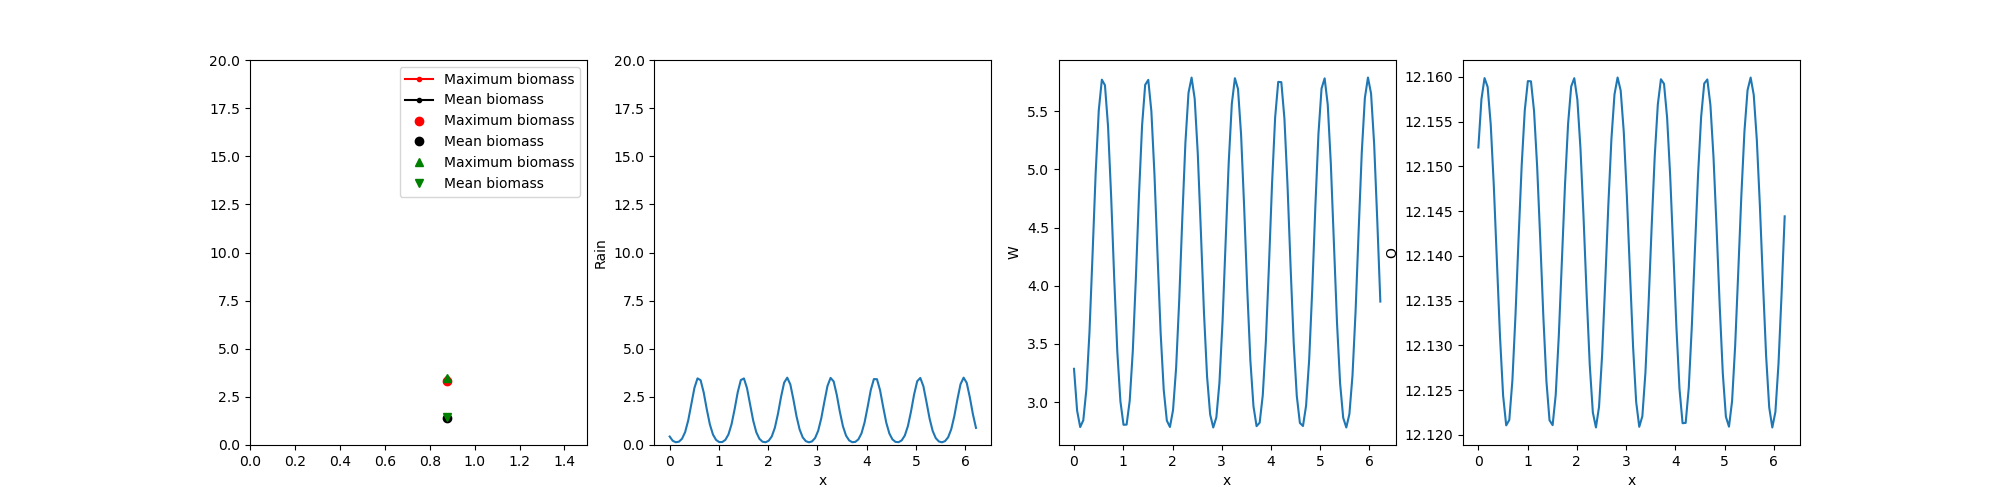

In [252]:
plot_sols(sols2,-1)

In [253]:
save_RvsPWO(sols2,'sols2','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','O',mode+'R0',int(np.round(L)))

In [254]:
Rain,Pg,Wg,Og = sols2[-1]
Rain = Rain + 0.001
Pg = Pg+0.7
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols3 = [[Rain,Pnew,Wnew,Onew]]


0.8781780845080455


In [255]:
Rain,Pg,Wg,Og = sols3[0]
while Rain < 1.14:
    Rain = Rain+0.01
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols3.append([Rain,Pg,Wg,Og])


100.00000000034545


()

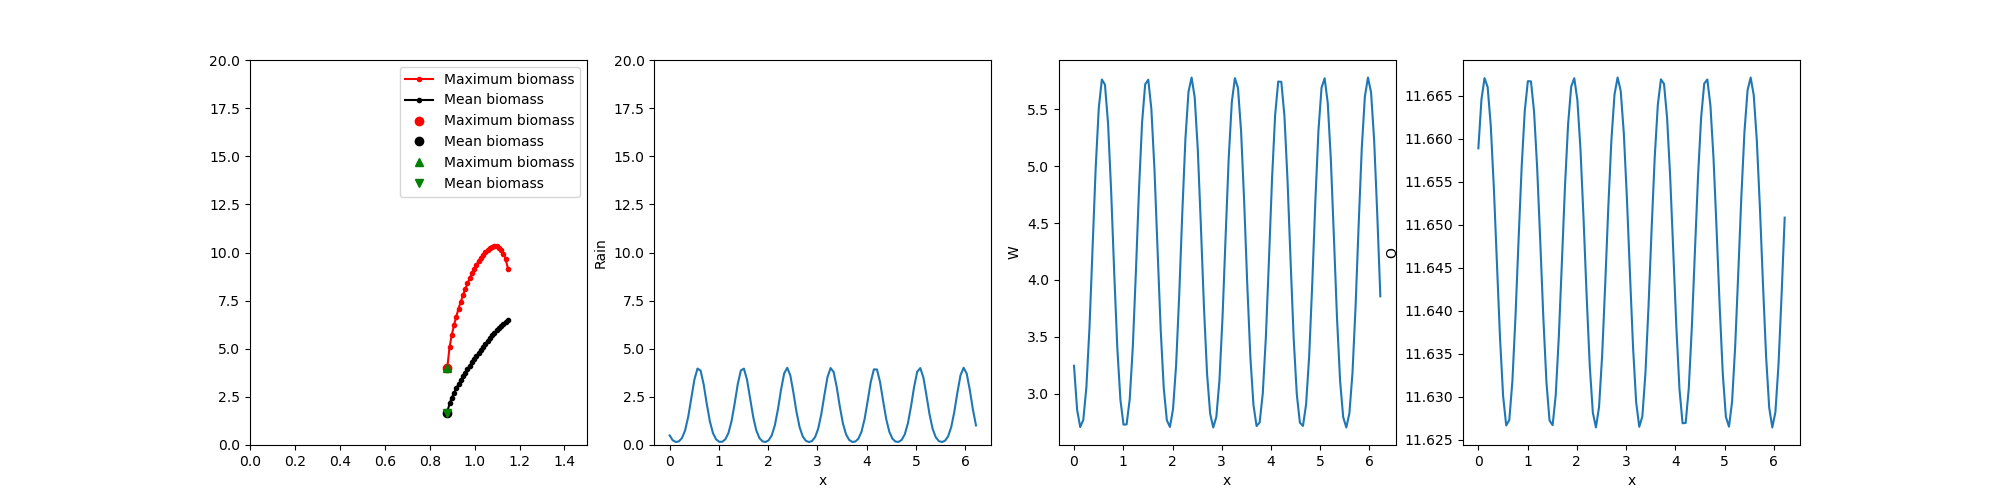

In [257]:
plot_sols(sols3,0)

In [258]:
save_RvsPWO(sols3,'sols3','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols3,'sols3','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols3,'sols3','O',mode+'R0',int(np.round(L)))

In [259]:
Rain,Pg,Wg,Og = sols3[-1]
Rain = Rain + 0.00
Pg = Pg+0
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols4 = [[Rain,Pnew,Wnew,Onew]]


1.1481780845080456


In [260]:
Rain,Pg,Wg,Og = sols4[0]
while Rain < 1.1643:
    Rain = Rain+0.0001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols4.append([Rain,Pg,Wg,Og])


100.00000000034545


()

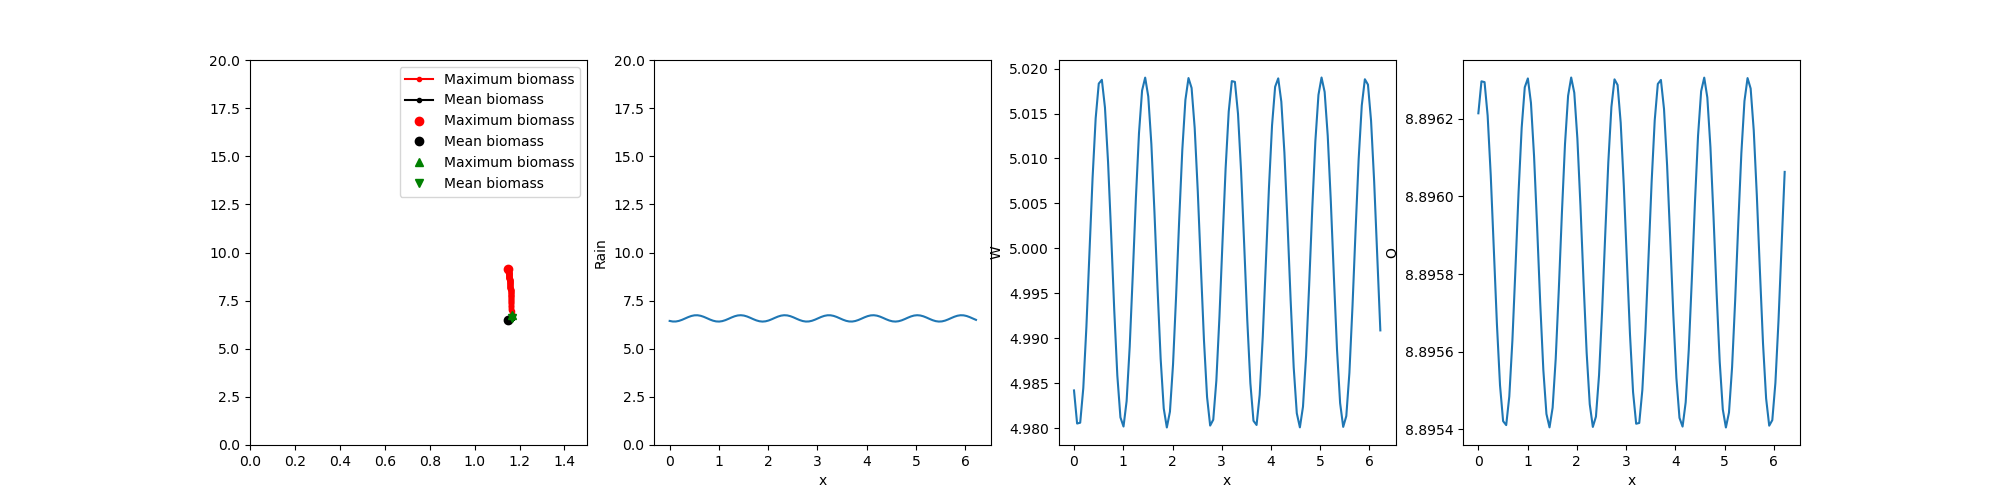

In [261]:
plot_sols(sols4,-1)

In [262]:
save_RvsPWO(sols4,'sols4','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols4,'sols4','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols4,'sols4','O',mode+'R0',int(np.round(L)))

In [263]:
Rain,Pg,Wg,Og = sols4[-1]
Rain = Rain + 0.00
Pg = Pg+0
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols5 = [[Rain,Pnew,Wnew,Onew]]


1.1643780845080438


In [264]:
Rain,Pg,Wg,Og = sols5[0]
while Rain < 1.165:
    Rain = Rain+0.00001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols5.append([Rain,Pg,Wg,Og])


100.00000000034545


()

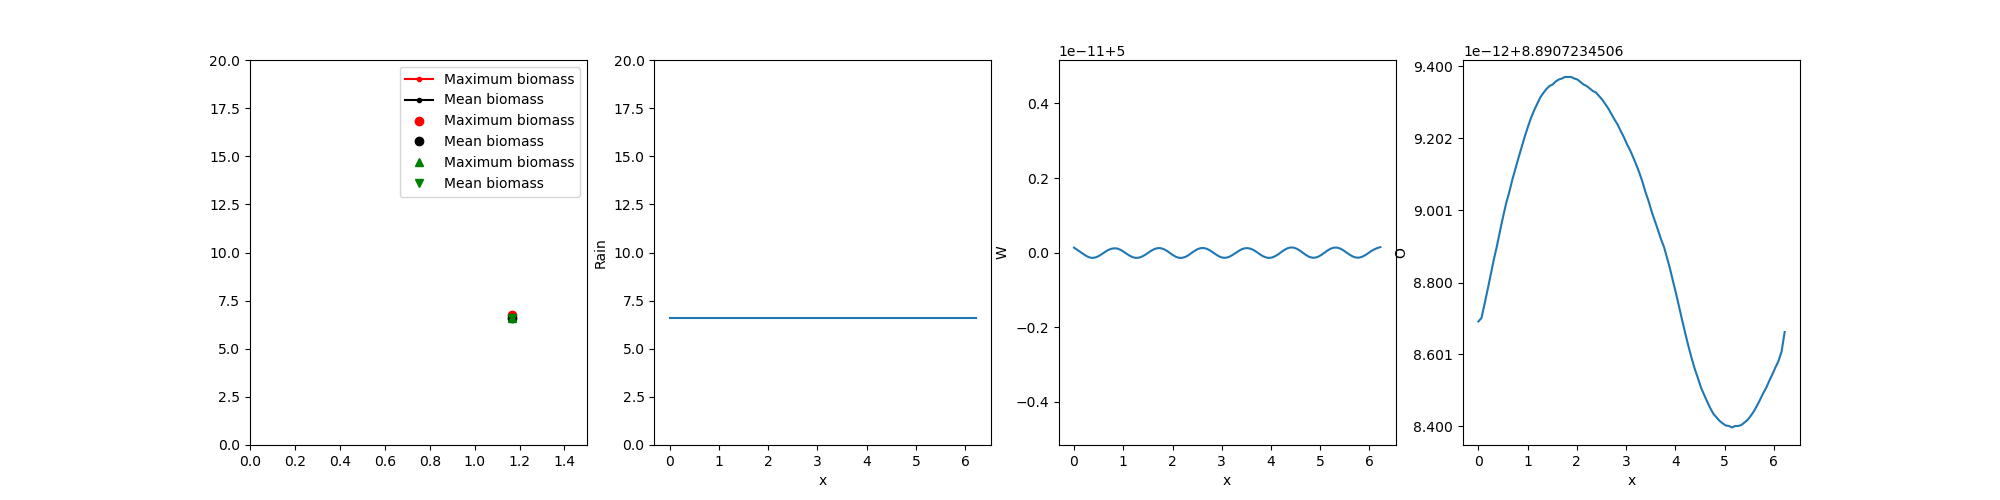

In [265]:
plot_sols(sols5,-1)

In [266]:
save_RvsPWO(sols5,'sols5','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols5,'sols5','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols5,'sols5','O',mode+'R0',int(np.round(L)))

### Eighth mode with low rainfall

1.0121686533791947


Text(0, 0.5, '$\\kappa$')

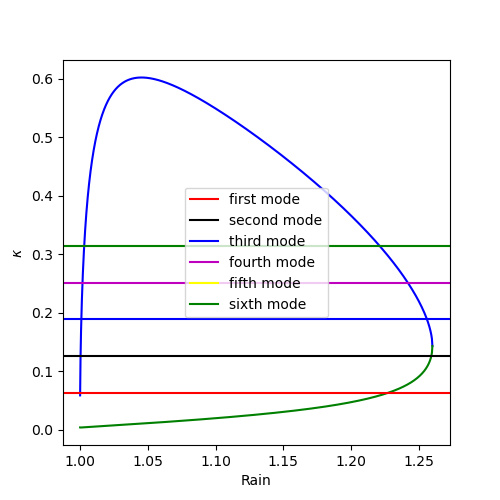

In [6]:
kappa=np.flip(np.loadtxt('Guesses1.dat'),axis=0)

L=100

valmin = 1.01
valmax = 1.015
n_lmb=8
R=find_kappa_U(L,n_lmb,valmin,valmax,kappa)
print(R)
#R2=find_kappa_U(L,3,valmin,valmax,kappa)
#print(R2)


N=100
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.plot(kappa[:,0],kappa[:,1],'b')
ax.plot(kappa[:,0],kappa[:,2],'g')
ax.axhline(2*np.pi/L,color='r',label='first mode')
ax.axhline(2*2*np.pi/L,color='k',label='second mode')
ax.axhline(3*2*np.pi/L,color='b',label='third mode')
ax.axhline(4*2*np.pi/L,color='m',label='fourth mode')
ax.axhline(5*2*np.pi/L,color='yellow',label='fifth mode')
ax.axhline(5*2*np.pi/L,color='green',label='sixth mode')
ax.legend()
ax.set_xlabel('Rain')
ax.set_ylabel(r'$\kappa$')

100.00000000064281
0.5026548245711357


Text(0, 0.5, 'O')

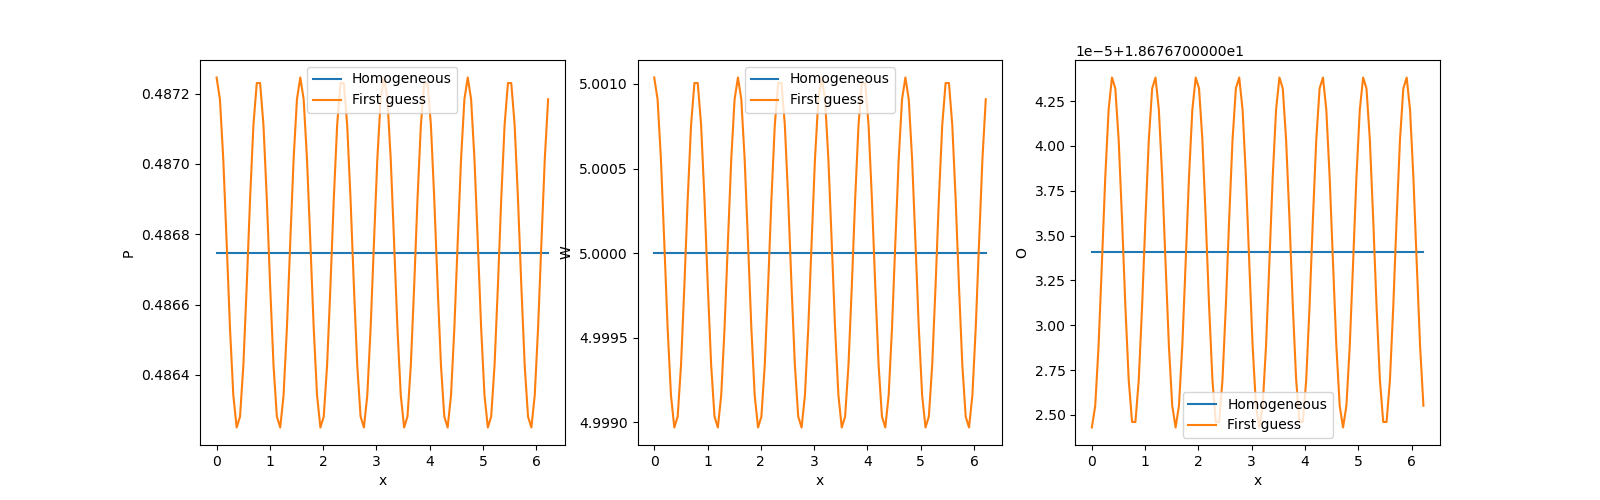

In [30]:
Rain,L,N,D2,x,Pg,Wg,Og,k = initialGuess(R,kappa,mode="U",n_lmb=n_lmb,eps=0.0005,N=N)
print(L)
print(k)
Ph,Wh,Oh=homogeneous(Rain)
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Ph*np.ones(N),label='Homogeneous')
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wh*np.ones(N),label='Homogeneous')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Oh*np.ones(N),label='Homogeneous')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

In [31]:
Rain,L,N,D2,x,Pg,Wg,Og,k = initialGuess(R,kappa,mode="U",n_lmb=n_lmb,eps=0.01,N=N)
mode='eight'
Rain = Rain-0.0001
Pg=Pg
print(L)
#Ph,Wh,Oh = homogeneous(Rain)
eps_newton = 0.01; # initial ϵ_newton
for it in range(600):
    Pnew,Wnew,Onew = newton(L,N,Rain,Pg,Wg,Og,eps_newton,param)
    delta_list = [np.max(np.abs(Pnew - Pg)),np.max(np.abs(Wnew - Wg)),np.max(np.abs(Onew - Og))]
    max_update = np.max(delta_list)
    source = static_eqs(L,N,Rain,Pnew,Wnew,Onew,param)
    max_source = np.abs(np.sum(source)/(3*N))
    if max_update < 1e-6 and max_source < 1e-10:
        print(max_update, max_source)
        break
    elif it>=30 and max_update<0.1:
        eps_newton = 0.1
    elif it>=50 and max_update<0.01:
        eps_newton = 1.0
    #elseif it>=50 && max_update<0.001
    #    ϵ_newton = 1.1
    elif max_update > 10:
        print(max_update, max_source)
        print("failed")
        break
    Pg, Wg, Og = Pnew, Wnew, Onew

100.00000000064281
4.4610007510215155e-07 8.570460363502146e-11


1.0120686533791947


Text(0, 0.5, 'O')

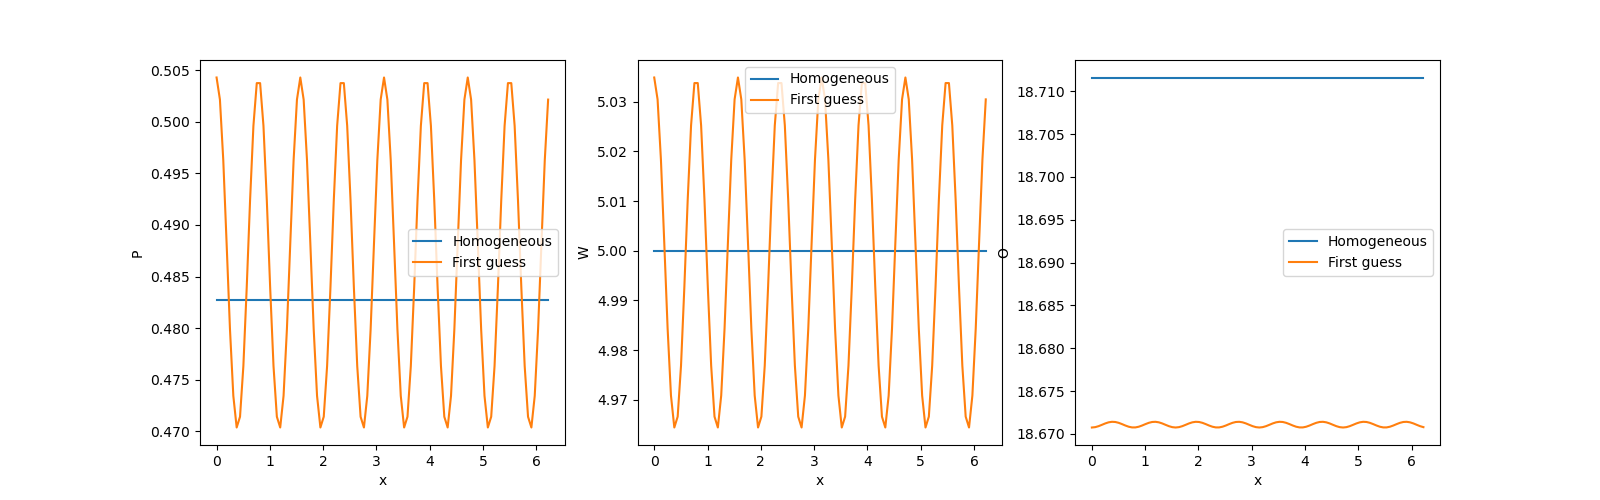

In [32]:
Ph,Wh,Oh=homogeneous(Rain)
print(Rain)
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Ph*np.ones(N),label='Homogeneous')
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wh*np.ones(N),label='Homogeneous')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Oh*np.ones(N),label='Homogeneous')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

In [33]:
Rain = Rain-0.0001
#Pg=P
#Wg=W
#Og=O

sols = [[Rain,Pg,Wg,Og]]
while Rain > 0.95:
    Rain = Rain-0.01
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og)
    sols.append([Rain,Pg,Wg,Og])


100.00000000064281


()

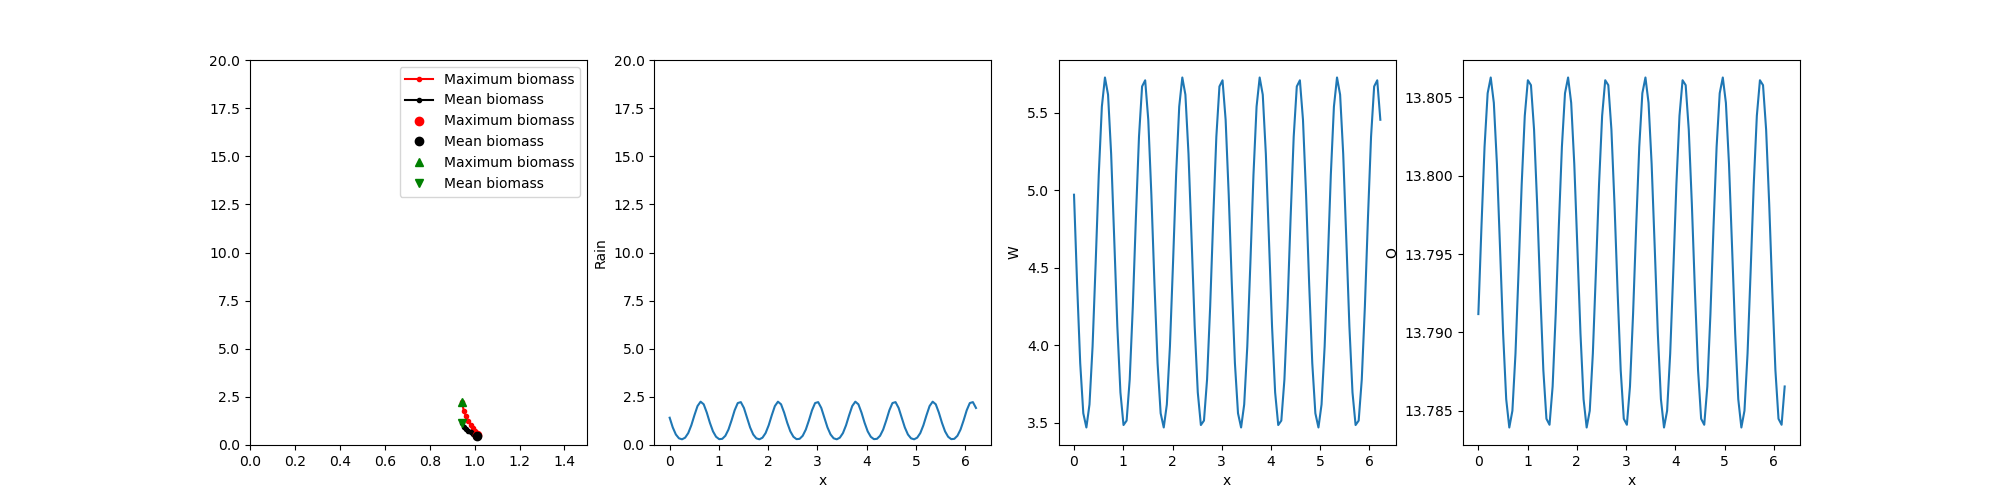

In [34]:
plot_sols(sols,-1)


In [35]:
save_RvsPWO(sols,'sols1','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','O',mode+'R0',int(np.round(L)))

In [40]:
Rain,Pg,Wg,Og = sols[-1]
Rain = Rain + 0.00
Pg = Pg + 0.0
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols2 = [[Rain,Pnew,Wnew,Onew]]


0.9419686533791947


In [42]:
Rain,Pg,Wg,Og = sols2[0]
while Rain > 0.9366:
    Rain = Rain-0.0001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
    sols2.append([Rain,Pg,Wg,Og])


100.00000000064281


()

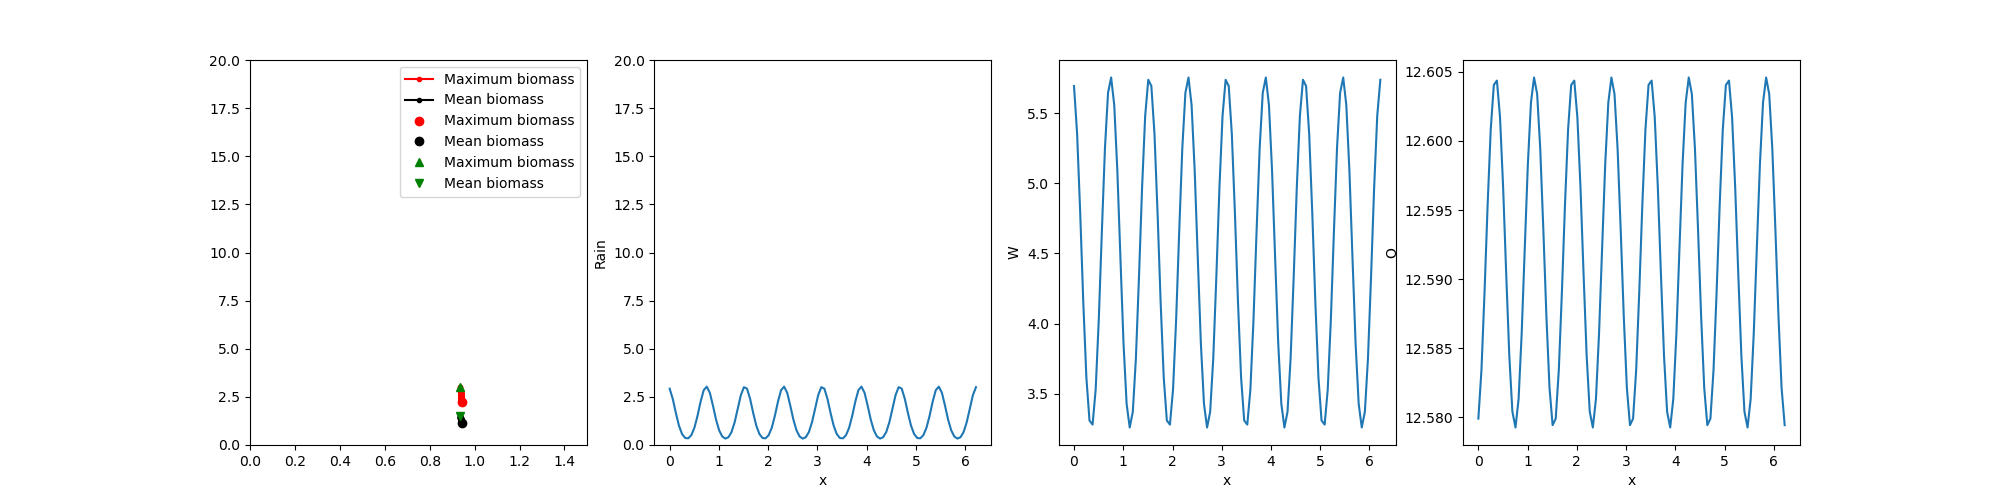

In [43]:
plot_sols(sols2,-1)

In [44]:
save_RvsPWO(sols2,'sols2','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','O',mode+'R0',int(np.round(L)))

In [57]:
Rain,Pg,Wg,Og = sols2[-1]
Rain = Rain + 0.001
Pg = Pg+1.5
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols3 = [[Rain,Pnew,Wnew,Onew]]


0.9375686533791953


In [58]:
Rain,Pg,Wg,Og = sols3[0]
while Rain < 1.12:
    Rain = Rain+0.01
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols3.append([Rain,Pg,Wg,Og])


100.00000000064281


()

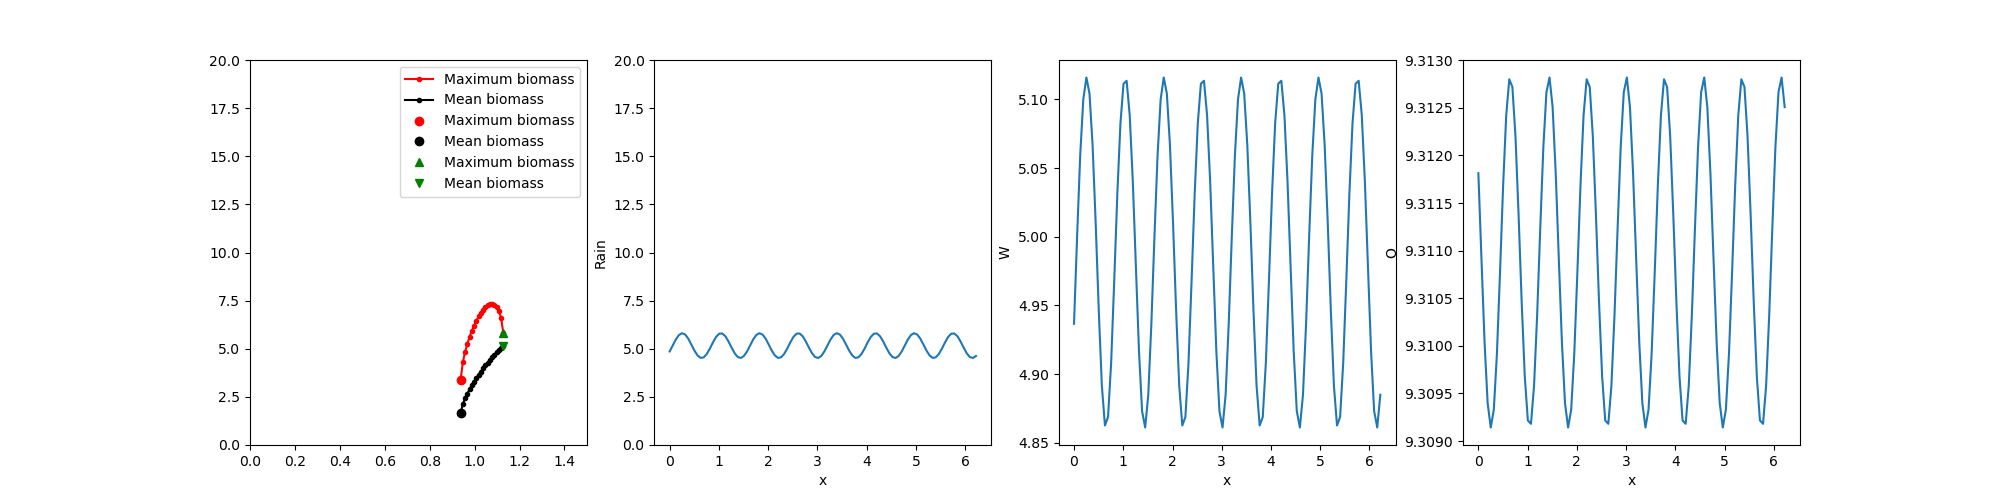

In [59]:
plot_sols(sols3,-1)

In [60]:
save_RvsPWO(sols3,'sols3','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols3,'sols3','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols3,'sols3','O',mode+'R0',int(np.round(L)))

In [64]:
Rain,Pg,Wg,Og = sols3[-1]
Rain = Rain + 0.00
Pg = Pg+0
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols4 = [[Rain,Pnew,Wnew,Onew]]


1.1275686533791953


In [65]:
Rain,Pg,Wg,Og = sols4[0]
while Rain < 1.130:
    Rain = Rain+0.0001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-5,crit_source = 1e-7)
    sols4.append([Rain,Pg,Wg,Og])


100.00000000064281


()

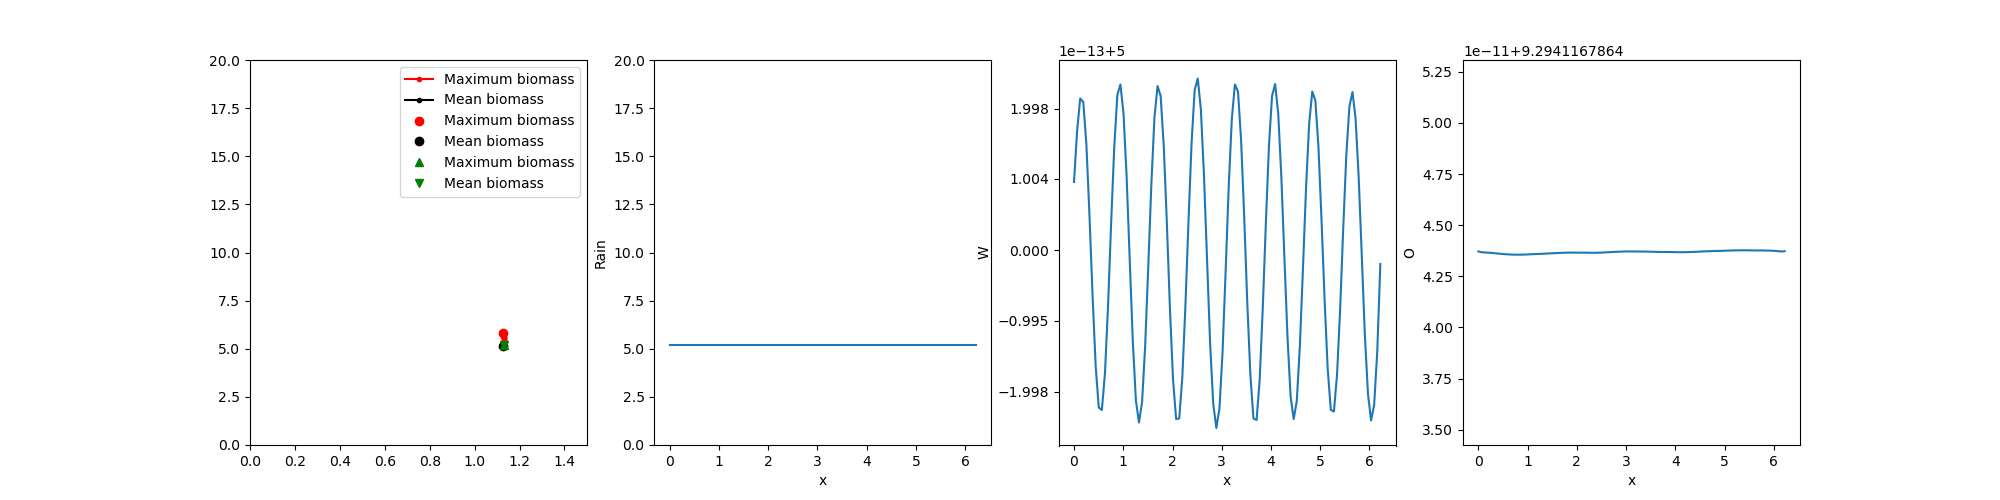

In [66]:
plot_sols(sols4,-1)

In [67]:
save_RvsPWO(sols4,'sols4','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols4,'sols4','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols4,'sols4','O',mode+'R0',int(np.round(L)))

### Nineth mode with low rainfall

1.021345542317722


Text(0, 0.5, '$\\kappa$')

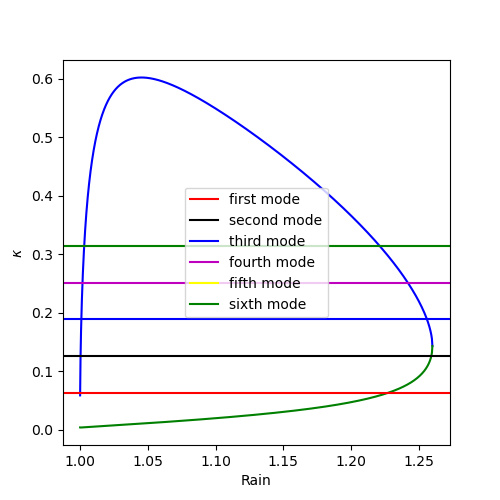

In [5]:
kappa=np.flip(np.loadtxt('Guesses1.dat'),axis=0)

L=100

valmin = 1.02
valmax = 1.025
n_lmb=9
R=find_kappa_U(L,n_lmb,valmin,valmax,kappa)
print(R)
#R2=find_kappa_U(L,3,valmin,valmax,kappa)
#print(R2)


N=100
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.plot(kappa[:,0],kappa[:,1],'b')
ax.plot(kappa[:,0],kappa[:,2],'g')
ax.axhline(2*np.pi/L,color='r',label='first mode')
ax.axhline(2*2*np.pi/L,color='k',label='second mode')
ax.axhline(3*2*np.pi/L,color='b',label='third mode')
ax.axhline(4*2*np.pi/L,color='m',label='fourth mode')
ax.axhline(5*2*np.pi/L,color='yellow',label='fifth mode')
ax.axhline(5*2*np.pi/L,color='green',label='sixth mode')
ax.legend()
ax.set_xlabel('Rain')
ax.set_ylabel(r'$\kappa$')

100.00000000054479
0.565486677643082


Text(0, 0.5, 'O')

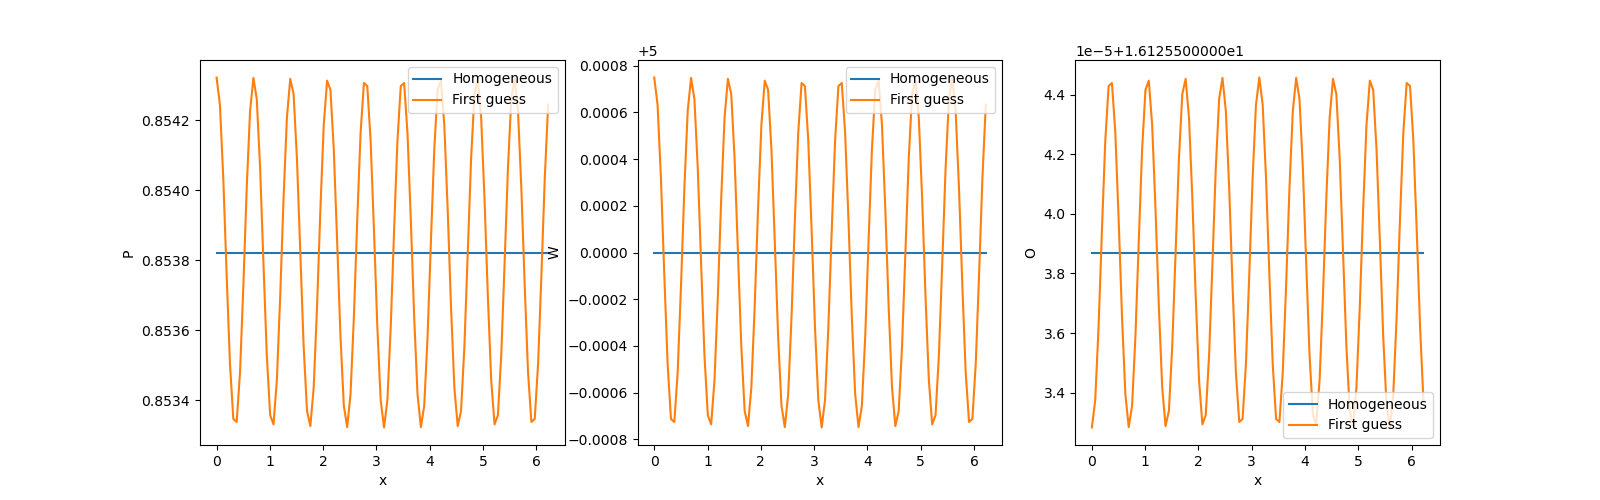

In [12]:
Rain,L,N,D2,x,Pg,Wg,Og,k = initialGuess(R,kappa,mode="U",n_lmb=n_lmb,eps=0.0005,N=N)
print(L)
print(k)
Ph,Wh,Oh=homogeneous(Rain)
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Ph*np.ones(N),label='Homogeneous')
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wh*np.ones(N),label='Homogeneous')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Oh*np.ones(N),label='Homogeneous')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

In [13]:
Rain,L,N,D2,x,Pg,Wg,Og,k = initialGuess(R,kappa,mode="U",n_lmb=n_lmb,eps=0.01,N=N)
mode='nine'
Rain = Rain-0.0001
Pg=Pg
print(L)
#Ph,Wh,Oh = homogeneous(Rain)
eps_newton = 0.01; # initial ϵ_newton
for it in range(600):
    Pnew,Wnew,Onew = newton(L,N,Rain,Pg,Wg,Og,eps_newton,param)
    delta_list = [np.max(np.abs(Pnew - Pg)),np.max(np.abs(Wnew - Wg)),np.max(np.abs(Onew - Og))]
    max_update = np.max(delta_list)
    source = static_eqs(L,N,Rain,Pnew,Wnew,Onew,param)
    max_source = np.abs(np.sum(source)/(3*N))
    if max_update < 1e-6 and max_source < 1e-10:
        print(max_update, max_source)
        break
    elif it>=30 and max_update<0.1:
        eps_newton = 0.1
    elif it>=50 and max_update<0.01:
        eps_newton = 1.0
    #elseif it>=50 && max_update<0.001
    #    ϵ_newton = 1.1
    elif max_update > 10:
        print(max_update, max_source)
        print("failed")
        break
    Pg, Wg, Og = Pnew, Wnew, Onew

100.00000000054479
8.048230606405582e-07 3.155170307443493e-11


1.021245542317722


Text(0, 0.5, 'O')

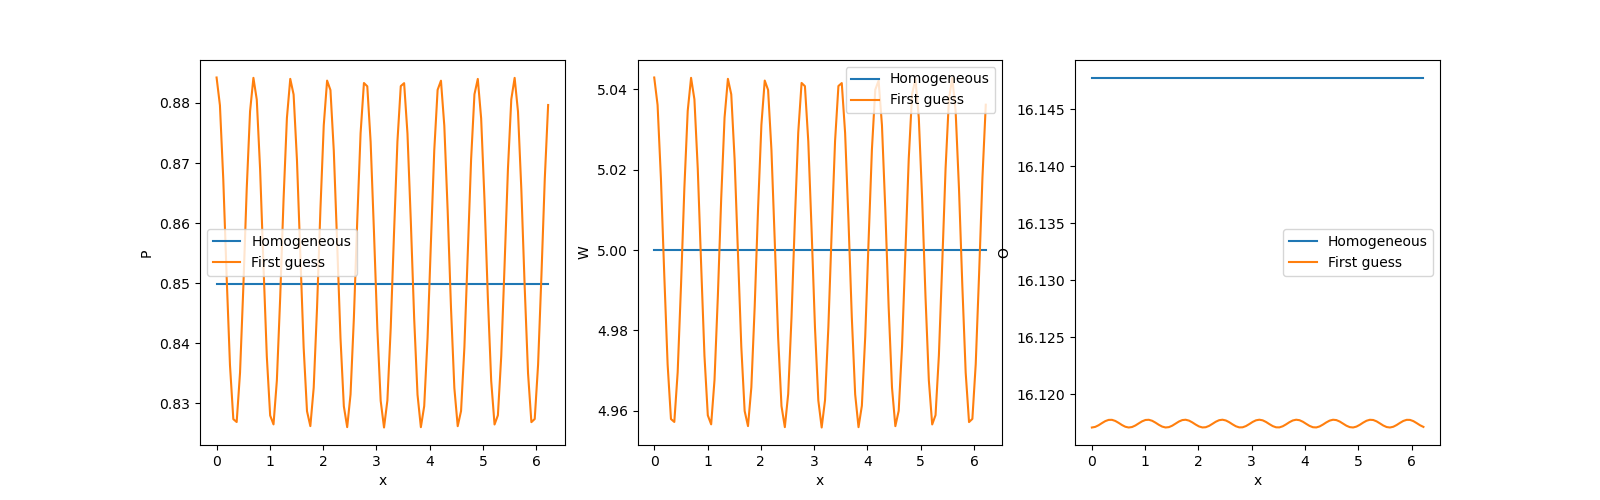

In [14]:
Ph,Wh,Oh=homogeneous(Rain)
print(Rain)
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(x,Ph*np.ones(N),label='Homogeneous')
ax[0].plot(x,Pg,label='First guess')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('P')
ax[1].plot(x,Wh*np.ones(N),label='Homogeneous')
ax[1].plot(x,Wg,label='First guess')
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('W')
ax[2].plot(x,Oh*np.ones(N),label='Homogeneous')
ax[2].plot(x,Og,label='First guess')
ax[2].legend()
ax[2].set_xlabel('x')
ax[2].set_ylabel('O')

In [15]:
Rain = Rain-0.0001
#Pg=P
#Wg=W
#Og=O

sols = [[Rain,Pg,Wg,Og]]
while Rain > 1.001:
    Rain = Rain-0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og)
    sols.append([Rain,Pg,Wg,Og])


100.00000000054479


()

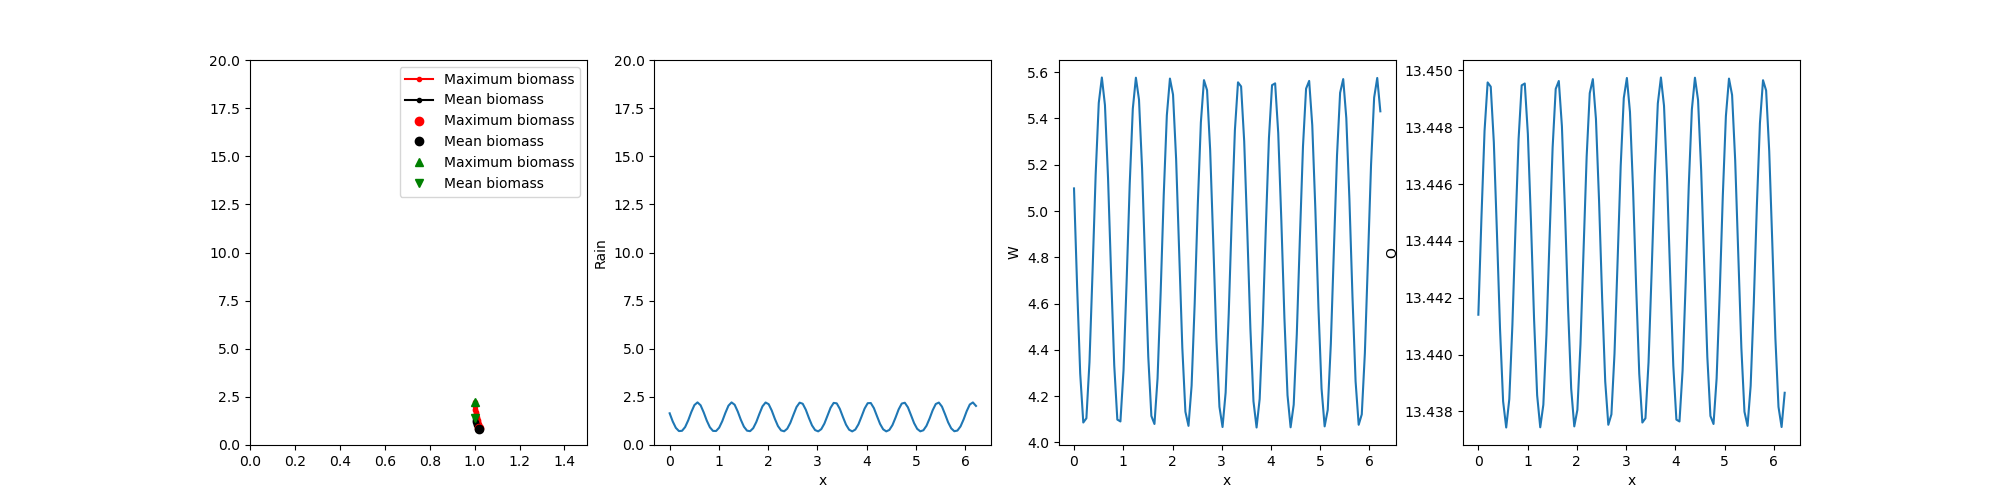

In [16]:
plot_sols(sols,-1)

In [143]:
save_RvsPWO(sols,'sols1','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols,'sols1','O',mode+'R0',int(np.round(L)))

In [26]:
Rain,Pg,Wg,Og = sols[-1]
Rain = Rain + 0.001
Pg = Pg + 2.8
Rain,Pnew,Wnew,Onew = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)

print(Rain)
sols2 = [[Rain,Pnew,Wnew,Onew]]


1.0011455423177242


In [27]:
Rain,Pg,Wg,Og = sols2[0]
while Rain < 1.1:
    Rain = Rain+0.001
    Rain,Pg,Wg,Og = newton_iterate(500,Rain,L,param,Pg,Wg,Og,crit_update = 1e-6,crit_source = 1e-10)
    sols2.append([Rain,Pg,Wg,Og])


100.00000000054479


()

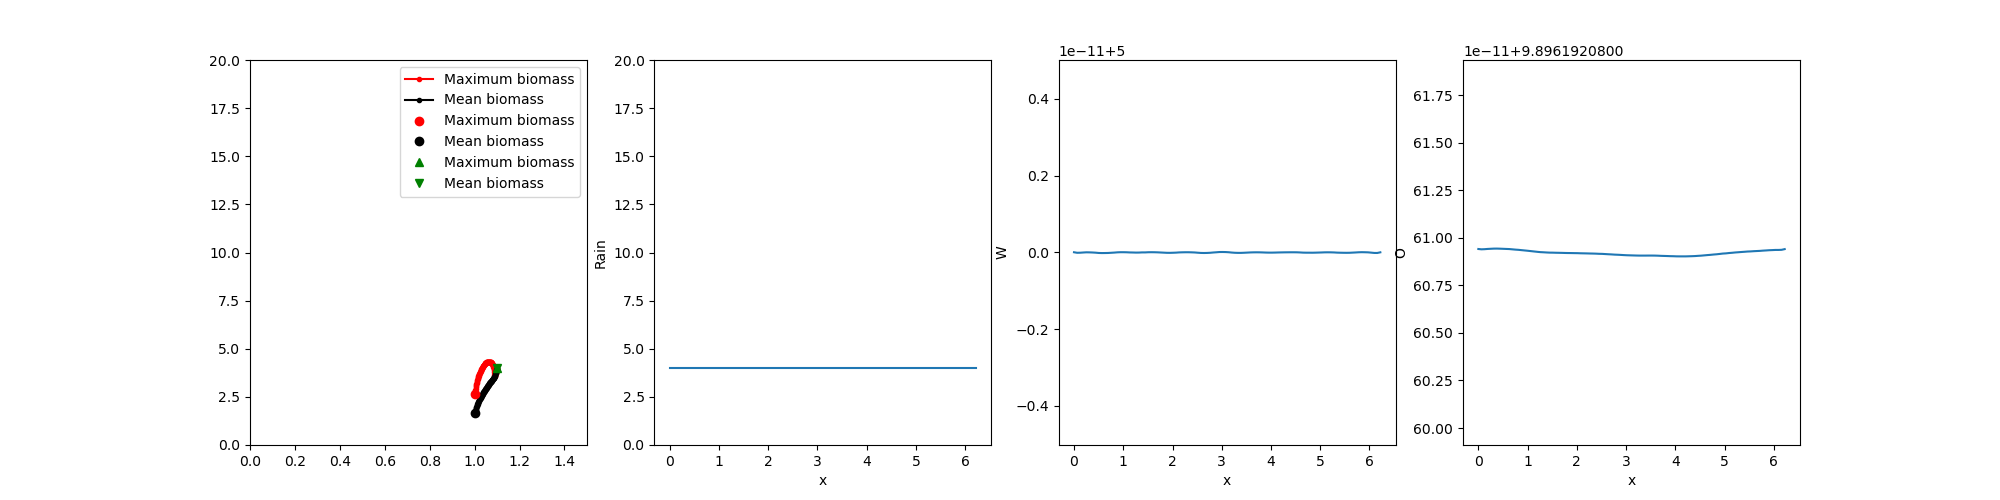

In [28]:
plot_sols(sols2,-1)

In [29]:
save_RvsPWO(sols2,'sols2','P',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','W',mode+'R0',int(np.round(L)))
save_RvsPWO(sols2,'sols2','O',mode+'R0',int(np.round(L)))